In [ ]:
## Startup imports and define directory

import numpy as np
import matplotlib.pyplot as plt

ddir = '/Users/XcaliburZee/Desktop/PHYS3900/NGC2808/'

# Creation of masterfile

In individual files, some magnitudes are 0 and are irrelevant when producing the CMD. We need to filter them out and create a masterfile with the stars of non-zero magnitudes.

What to have in the masterfile;

f606w mag | f816w mag | f606w - f814w | star ID

In [ ]:
# Opening the needed files

f606w = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc_ngc2808_f606w_v1.0_phot-catalog-ep2.txt')
f814w = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc_ngc2808_f814w_v1.0_phot-catalog-ep2.txt')
pmcat = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc3_ngc2808_multi_v1.0_pm-catalog.txt')

In [ ]:
                                                   # for f606w catalog
mag606        = f606w[:,0]                         # star magnitudes
magrms606     = f606w[:,1]                         # mag rms
qfit606       = f606w[:,2]                         # QFIT
o606          = f606w[:,3]                         # o
nf606         = f606w[:,4]                         # Nf
nu606         = f606w[:,5]                         # Nu
radxs606      = f606w[:,6]                         # RADXS
sky606        = f606w[:,7]                         # sky
skyrms606     = f606w[:,8]                         # sky rms
sat606        = f606w[:,9]                         # saturation flag

                                                  # for f814w catalog
mag814        = f814w[:,0]                        # star magnitudes for f814w
magrms814     = f814w[:,1]                        # mag rms
qfit814       = f814w[:,2]                        # QFIT
o814          = f814w[:,3]                        # o
nf814         = f814w[:,4]                        # Nf
nu814         = f814w[:,5]                        # Nu
radxs814      = f814w[:,6]                        # RADXS
sky814        = f814w[:,7]                        # sky
skyrms814     = f814w[:,8]                        # sky rms
sat814        = f814w[:,9]                        # saturation flag

magdif        = f606w[:,0] - f814w[:,0]           # star magnitude difference, f606w - f814w

                                                  # for pm catalog
asc           = pmcat[:,0]                        # ascension
dec           = pmcat[:,1]                        # declination
xcoor         = pmcat[:,2]                        # x-coordinate
ycoor         = pmcat[:,3]                        # y-coordinate
acosd         = pmcat[:,4]                        # alpha cos delta
err_acosd     = pmcat[:,5]                        # error of alpha cos delta
d             = pmcat[:,6]                        # delta
err_d         = pmcat[:,7]                        # error of delta
chi2_acosd    = pmcat[:,8]                        # chi2 alpha cos delta
chi2_d        = pmcat[:,9]                        # chi2 delta
nfpm          = pmcat[:,10]                       # Nf
nupm          = pmcat[:,11]                       # Nu
tbase         = pmcat[:,12]                       # temporal baseline of PM [time]
raw_acosd     = pmcat[:,13]                       # raw alpha cos delta
err_raw_acosd = pmcat[:,14]                       # error of raw alpha cos delta
raw_d         = pmcat[:,15]                       # raw delta
err_raw_d     = pmcat[:,16]                       # error of raw delta
corr_f        = pmcat[:,17]                       # correction flag

oldID         = f606w[:,10]                       # star ID

#### Data needs to be filtered

From spectrometry

1) non-zero magnitudes
2) magnitudes within range; 0.6 < x < 1.0, y < 19.5
3) mag rms < 0.15
4) qfit > 0.75
5) radxs < 0.15
6) photometric ratio > 0.75 (Nu/Nf)
7) o < 1
8) flux above local sky > 3.5*sigma

From PM

1) Nu/Nf > 0.8-0.9
2) chi sq alpha cos(delta) < 1.5
3) chi sq delta < 1.5
4) PM error < 0.5 mas yr^-1

In [ ]:
# Creating empty arrays for filtered data

m606      = []                            # star mag f606w
m814      = []                            # star mag f814w
mag_dif   = []                            # f606w - f814w
x_new     = []                            # x-coordinate
y_new     = []                            # y-coordinate
AcosD     = []                            # alpha * cos(delta)
err_AcosD = []                            # error of alpha * cos(delta)
D         = []                            # delta
err_D     = []                            # error of delta
dist      = []                           # dist from center
newID     = []                           # star ID

for i in range(len(mag606)):
    
    # removing zero mags
    if mag606[i] != 0 and mag814[i] !=0:
        
        # removing stars out of range as in the CMD in HACKS
        if mag606[i] < 19.5 and magdif[i] > 0.6 and magdif[i] < 1:
            
            # removing star mag rms > 0.15
            if magrms606[i] < 0.15 and magrms814[i] < 0.15:
                
                # removing star QFIT < 0.75
                if qfit606[i] > 0.75 and qfit814[i] > 0.75:
                    
                    # removing star RADXS > 0.15
                    if radxs606[i] < 0.15 and radxs814[i] < 0.15:
                        
                        # removing star photometric ratio, Nu/Nf < 0.75
                        if nu606[i]/nf606[i] > 0.75 and nu814[i]/nf814[i] > 0.75:
                            
                            # removing star fractional flux, o > 1
                            if o606[i] < 1 and o814[i] < 1:
                                
                                # removing star flux above sky < 3.5 sigma
                                if skyrms606[i] > 3.5 and skyrms814[i] > 3.5:
                                    
                                    # removing star PM ratio, Nu/Nf < 0.8 (or 0.9)
                                    if nupm[i]/nfpm[i] > 0.9:
                                        
                                        # removing star chi2 alpha cos delta > 1.5 (or 1.25)
                                        if chi2_acosd[i] < 1.25:
                                            
                                            # removing star chi2 delta > 1.5 (or 1.25)
                                            if chi2_d[i] < 1.25:
                                                
                                                # removing star PM error > 0.5 mas/yr
                                                if err_acosd[i] < 0.5 and err_d[i] < 0.5:
                                                    
                                                    # removing star with uncorrected a-posteriori
                                                    if corr_f[i] == 0:
                                                        
                                                        # removing
                                                        if np.sqrt(acosd[i]**2 + d[i]**2) < 1:
                                                            
                                                            if mag606[i] > (-2.4/0.3)*magdif[i] + 23.2:
                                                        
                                                                m606      = np.append(m606, mag606[i])
                                                                m814      = np.append(m814, mag814[i])
                                                                mag_dif   = np.append(mag_dif, magdif[i])
                                                                x_new     = np.append(x_new, xcoor[i])
                                                                y_new     = np.append(y_new, ycoor[i])
                                                                AcosD     = np.append(AcosD, acosd[i])
                                                                err_AcosD = np.append(err_AcosD, err_acosd[i])
                                                                D         = np.append(D, d[i])
                                                                err_D     = np.append(err_D, err_d[i])
                                                                dist      = np.append(dist, np.sqrt((xcoor[i]-5000)**2 + (ycoor[i]-5000)**2)/25)
                                                                newID     = np.append(newID, oldID[i])


# eqn of straight lines used previously (1st attempt of reducing data)

# col1[i] < (-3.5/0.17)*col3[i] + 36.588
# col1[i] > (-2.4/0.3)*col3[i] + 23.2
# col1[i] < (-0.5/0.1)*col3[i] + 23
# col1[i] > (-3/0.25)*col3[i] + 26.8
# col1[i] < (-3.5/0.13)*col3[i] + 41.577

In [ ]:
newID = newID.astype(int)      # switching star ID from float to int so it is easier to read

In [ ]:
newID

In [ ]:
# Compiling all columns into masterfile

masterfile = np.stack((m606, m814, mag_dif, x_new, y_new, AcosD, err_AcosD, D, err_D, dist, newID), axis = -1)


In [ ]:
masterfile

In [ ]:
tot_star = len(masterfile)
print(len(masterfile))

In [ ]:
np.savetxt('masterfile.txt', masterfile)

#### Checking to see the number of stars in each range of distances

In [ ]:
print('No. stars between 0 to 5 arsec :'+str(len(np.where(dist<=5)[0])))
print('No. stars between 5 to 10 arsec :'+str(len(np.where(dist<=10)[0])-len(np.where(dist<=5)[0])))
print('No. stars between 10 to 15 arsec :'+str(len(np.where(dist<=15)[0])-len(np.where(dist<=10)[0])))
print('No. stars between 15 to 20 arsec :'+str(len(np.where(dist<=20)[0])-len(np.where(dist<=15)[0])))
print('No. stars between 20 to 25 arsec :'+str(len(np.where(dist<=25)[0])-len(np.where(dist<=20)[0])))
print('No. stars between 25 to 30 arsec :'+str(len(np.where(dist<=30)[0])-len(np.where(dist<=25)[0])))
print('No. stars between 30 to 35 arsec :'+str(len(np.where(dist<=35)[0])-len(np.where(dist<=30)[0])))
print('No. stars between 35 to 40 arsec :'+str(len(np.where(dist<=40)[0])-len(np.where(dist<=35)[0])))
print('No. stars between 40 to 42.5 arsec :'+str(len(np.where(dist<=42.5)[0])-len(np.where(dist<=40)[0])))
print('No. stars between 42.5 to 45 arsec :'+str(len(np.where(dist<=45)[0])-len(np.where(dist<=42.5)[0])))
print('No. stars between 45 to 47.5 arsec :'+str(len(np.where(dist<=47.5)[0])-len(np.where(dist<=45)[0])))
print('No. stars between 47.5 to 50 arsec :'+str(len(np.where(dist<=50)[0])-len(np.where(dist<=47.5)[0])))
print('No. stars between 50 to 55 arsec :'+str(len(np.where(dist<=55)[0])-len(np.where(dist<=50)[0])))
print('No. stars between 55 to 60 arsec :'+str(len(np.where(dist<=60)[0])-len(np.where(dist<=55)[0])))
print('No. stars between 60 to 65 arsec :'+str(len(np.where(dist<=65)[0])-len(np.where(dist<=60)[0])))
print('No. stars between 65 to 70 arsec :'+str(len(np.where(dist<=70)[0])-len(np.where(dist<=65)[0])))
print('No. stars between 70 to 75 arsec :'+str(len(np.where(dist<=75)[0])-len(np.where(dist<=70)[0])))
print('No. stars between 75 to 80 arsec :'+str(len(np.where(dist<=80)[0])-len(np.where(dist<=75)[0])))
print('No. stars between 80 to 85 arsec :'+str(len(np.where(dist<=85)[0])-len(np.where(dist<=80)[0])))
print('No. stars between 85 to 90 arsec :'+str(len(np.where(dist<=90)[0])-len(np.where(dist<=85)[0])))
print('No. stars between 90 to 95 arsec :'+str(len(np.where(dist<=95)[0])-len(np.where(dist<=90)[0])))
print('No. stars between 95 to 100 arsec :'+str(len(np.where(dist<=100)[0])-len(np.where(dist<=95)[0])))
print('No. stars between 100 to 105 arsec :'+str(len(np.where(dist<=105)[0])-len(np.where(dist<=100)[0])))
print('No. stars between 105 to 110 arsec :'+str(len(np.where(dist<=110)[0])-len(np.where(dist<=105)[0])))
print('No. stars between 110 to 115 arsec :'+str(len(np.where(dist<=115)[0])-len(np.where(dist<=110)[0])))
print('No. stars between 115 to 120 arsec :'+str(len(np.where(dist<=120)[0])-len(np.where(dist<=115)[0])))
print('No. stars between 120 to 125 arsec :'+str(len(np.where(dist<=125)[0])-len(np.where(dist<=120)[0])))
print('No. stars between 125 to 130 arsec :'+str(len(np.where(dist<=130)[0])-len(np.where(dist<=125)[0])))

#### Sorting the distance in ascending order

In [ ]:
sortdist = np.sort(dist)

In [ ]:
print(dist)
print(sortdist)

#### Sorting velocity the same arrangement as done for distance

In [ ]:
sortvel = np.zeros(tot_star)
sortvelerr = np.zeros(tot_star)
print(sortvel)

In [ ]:
for j in range(tot_star):
    sortvel[np.searchsorted(sortdist, dist[j])]=AcosD[j]
    sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]
    

print(sortvel)
print(AcosD)

## Creating Velocity Dispersion Catalog

### Bins




Equation used to find the velocity dispersion profile, $\sigma_\mu$, for each bin:

\begin{equation} \sigma_\mu = \sqrt{\frac{\Sigma\alpha cos(\delta)^2}{N}} \end{equation}



In [ ]:
pmcol1 = []                       # bin number
pmcol2 = []                       # number of stars
pmcol3 = []                       # average distance from center
pmcol4 = []                       # combined velocity dispersion
pmcol5 = []                       # error of combined velocity dispersion
pmcol6 = []                       # 

pmcol1 = np.arange(1,26,1)

for i in range(len(pmcol1)):
    N = int(input('Number of stars for bin{}:'.format(i+1)))
    pmcol2 = np.append(pmcol2, N)
    prevstar_tot = 0
    s = i
    while s != 0:
        prevstars = pmcol2[s-1]
        prevstar_tot += prevstars
        s -= 1
        
    if i == 0:    
        pmcol3 = np.append(pmcol3, np.average(sortdist[0:N]))
        pmcol4 = np.append(pmcol4, np.sqrt( ( np.sum( sortvel[0:N]**2  )/(N) )))
        
    else:
        pmcol3 = np.append(pmcol3, np.average(sortdist[int(prevstar_tot+1):int(prevstar_tot+N)]))
        pmcol4 = np.append(pmcol4, np.sqrt( ( np.sum( sortvel[int(prevstar_tot+1):int(prevstar_tot+N)])**2  )/(N) ))
    
    pmcol5 = np.append(pmcol5, pmcol4[i]/np.sqrt(N))
    prevstar_tot += N
    print('Stars left:{}'.format(tot_star-prevstar_tot))

In [ ]:
VDP = np.stack((pmcol1,pmcol2,pmcol3,pmcol4,pmcol5),axis=-1)
np.savetxt('VDP.txt', VDP)

In [ ]:
test = np.zeros(25) 
test[0] = np.sqrt( ( np.sum( sortvel[0:64]**2  )/(64) ))
test[1] = np.sqrt( ( np.sum( sortvel[65:194]**2  )/(130) ))
test[2] = np.sqrt( ( np.sum( sortvel[195:398]**2  )/(204) ))
test[3] = np.sqrt( ( np.sum( sortvel[399:602]**2  )/(204) ))
test[4] = np.sqrt( ( np.sum( sortvel[603:972]**2  )/(370) ))
test[5] = np.sqrt( ( np.sum( sortvel[973:1342]**2  )/(370) ))
test[6] = np.sqrt( ( np.sum( sortvel[1343:1712]**2  )/(370) ))
test[7] = np.sqrt( ( np.sum( sortvel[1713:2082]**2  )/(370) ))
test[8] = np.sqrt( ( np.sum( sortvel[2083:2452]**2  )/(370) ))
test[9] = np.sqrt( ( np.sum( sortvel[2453:2822]**2  )/(370) ))
test[10] = np.sqrt( ( np.sum( sortvel[2823:3192]**2  )/(370) ))
test[11] = np.sqrt( ( np.sum( sortvel[3193:3562]**2  )/(370) ))
test[12] = np.sqrt( ( np.sum( sortvel[3563:3932]**2  )/(370) ))
test[13] = np.sqrt( ( np.sum( sortvel[3933:4302]**2  )/(370) ))
test[14] = np.sqrt( ( np.sum( sortvel[4303:4672]**2  )/(370) ))
test[15] = np.sqrt( ( np.sum( sortvel[4673:5042]**2  )/(370) ))
test[16] = np.sqrt( ( np.sum( sortvel[5043:5412]**2  )/(370) ))
test[17] = np.sqrt( ( np.sum( sortvel[5413:5782]**2  )/(370) ))
test[18] = np.sqrt( ( np.sum( sortvel[5783:6152]**2  )/(370) ))
test[19] = np.sqrt( ( np.sum( sortvel[6153:6522]**2  )/(370) ))
test[20] = np.sqrt( ( np.sum( sortvel[6523:6892]**2  )/(370) ))
test[21] = np.sqrt( ( np.sum( sortvel[6893:7262]**2  )/(370) ))
test[22] = np.sqrt( ( np.sum( sortvel[7263:7631]**2  )/(369) ))
test[23] = np.sqrt( ( np.sum( sortvel[7632:8000]**2  )/(369) ))
test[24] = np.sqrt( ( np.sum( sortvel[8001:8101]**2  )/(101) ))

In [ ]:
test

In [ ]:
err = []

for i in range(25):
    if i == 0:
        err = np.append(err, test[i]/np.sqrt(64))
    elif i == 1:
        err = np.append(err, test[i]/np.sqrt(130))
    elif i > 1 and i < 4:
        err = np.append(err, test[i]/np.sqrt(204))
    elif i > 21 and i < 24:
        err = np.append(err, test[i]/np.sqrt(369))
    elif i == 24:
        err = np.append(err, test[i]/np.sqrt(101))
    else:
        err = np.append(err, test[i]/np.sqrt(370))

In [ ]:
print(test)
print(err)

In [ ]:
pmcol4 = test
pmcol5 = err

In [ ]:
plt.scatter(pmcol3,test)
plt.errorbar(pmcol3,test,yerr=err,fmt='o')
plt.ylim(0,0.35)
plt.title('NGC2808 Velocity Dispersion Profile\n(stars assorted as in HACKS)')
plt.xlabel('Distance to the cluster center')
plt.ylabel('$\sigma_\mu , mas/yr$')
plt.grid()
plt.show()

# Loading Data after Logging Off

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

ddir = '/Users/XcaliburZee/Desktop/PHYS3900/NGC2808/'

In [2]:
# Loading from masterfile
m606, m814, mag_dif, x_new, y_new, AcosD, err_AcosD, D, err_D, dist, newID = np.loadtxt('/Users/XcaliburZee/masterfile.txt', unpack=True)
tot_star = len(newID)

# Loading from VDP
pmcol1,pmcol2,pmcol3,pmcol4,pmcol5=np.loadtxt('/Users/XcaliburZee/VDP.txt', unpack=True)
sortdist = np.sort(dist)
sortvel = np.zeros(tot_star)
sortvelerr = np.zeros(tot_star)
for j in range(tot_star):
    sortvel[np.searchsorted(sortdist, dist[j])]=AcosD[j]
    sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]

### Calculating the uncertainty correctly

Using the equation

\begin{equation} \ln L=-\frac{1}{2}\sum_{i=1}^{N}\left(\frac{v_i^2}{\sigma^2+\epsilon_i^2}+\ln(\sigma^2+\epsilon_i^2)\right) \end{equation}

In [ ]:
'''
def plotlnL(sigma, v_array, err_array):
    
    # ln L for each bin
    # sigma = velocity dispersion ~ col4 from VDP.txt
    # v_array = sortvel[bin]
    # err_array = sortvelerr[bin]
    
    velsum = 0
    for i in range(N):
        abc = sigma**2 + err_array[i]**2
        velsum += v_array[i]**2/abc + np.ln(abc)
    lnL = -0.5*velsum
    
    sigmalow = lnL-0.5 [0]
    sigmahigh = lnL-0.5 [1]
    
    
    
    
    plt.plot(sigma,lnL)
    plt.xlabel('$ln L$')
    plt.ylabel('$\sigma$')
    plt.hline(y, xmin, xmax, ls='--')                    # ln L max
    plt.hline(y, xmin, xmax, ls='--')                    # ln L max - 0.5
    plt.vline(x, ymin, ymax, ls='--')                    # midpoint
    plt.vline(x, ymin, ymax, ls='--')                    # del sigma low
    plt.vline(x, ymin, ymax, ls='--')                    # del sigma high
    plt.show()
'''

\begin{equation} \ln L=-\frac{1}{2}\sum_{i=1}^{N}\left(\frac{v_i^2}{\sigma^2+\epsilon_i^2}+\ln(\sigma^2+\epsilon_i^2)\right) \end{equation}

In [3]:
#bin 1
sigma = pmcol4[0]
vel = sortvel[0:64]
error = sortvelerr[0:64]
velsum = 0
lnL = []
for i in range(64):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [4]:
#bin 2
sigma = pmcol4[1]
vel = sortvel[64:194]
error = sortvelerr[64:194]
velsum = 0
#lnL = []
for i in range(130):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [5]:
#bin 3
sigma = pmcol4[2]
vel = sortvel[194:398]
error = sortvelerr[194:398]
velsum = 0
#lnL = []
for i in range(204):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [6]:
#bin 4
sigma = pmcol4[3]
vel = sortvel[398:602]
error = sortvelerr[398:602]
velsum = 0
#lnL = []
for i in range(204):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [7]:
#bin 5
sigma = pmcol4[4]
vel = sortvel[602:972]
error = sortvelerr[602:972]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [8]:
#bin 6
sigma = pmcol4[5]
vel = sortvel[972:1342]
error = sortvelerr[972:1342]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [9]:
#bin 7
sigma = pmcol4[6]
vel = sortvel[1342:1712]
error = sortvelerr[1342:1712]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [10]:
#bin 8
sigma = pmcol4[7]
vel = sortvel[1712:2082]
error = sortvelerr[1712:2082]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [11]:
#bin 9
sigma = pmcol4[8]
vel = sortvel[2082:2452]
error = sortvelerr[2082:2452]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [12]:
#bin 10
sigma = pmcol4[9]
vel = sortvel[2452:2822]
error = sortvelerr[2452:2822]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [13]:
#bin 11
sigma = pmcol4[10]
vel = sortvel[2822:3192]
error = sortvelerr[2822:3192]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [14]:
#bin 12
sigma = pmcol4[11]
vel = sortvel[3192:3562]
error = sortvelerr[3192:3562]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [15]:
#bin 13
sigma = pmcol4[12]
vel = sortvel[3562:3932]
error = sortvelerr[3562:3932]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [16]:
#bin 14
sigma = pmcol4[13]
vel = sortvel[3932:4302]
error = sortvelerr[3932:4302]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [17]:
#bin 15
sigma = pmcol4[14]
vel = sortvel[4302:4672]
error = sortvelerr[4302:4672]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [18]:
#bin 16
sigma = pmcol4[15]
vel = sortvel[4672:5042]
error = sortvelerr[4672:5042]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [19]:
#bin 17
sigma = pmcol4[16]
vel = sortvel[5042:5412]
error = sortvelerr[5042:5412]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [20]:
#bin 18
sigma = pmcol4[17]
vel = sortvel[5412:5782]
error = sortvelerr[5412:5782]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [21]:
#bin 19
sigma = pmcol4[18]
vel = sortvel[5782:6152]
error = sortvelerr[5782:6152]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [22]:
#bin 20
sigma = pmcol4[19]
vel = sortvel[6152:6522]
error = sortvelerr[6152:6522]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [23]:
#bin 21
sigma = pmcol4[20]
vel = sortvel[6522:6892]
error = sortvelerr[6522:6892]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [24]:
#bin 22
sigma = pmcol4[21]
vel = sortvel[6892:7262]
error = sortvelerr[6892:7262]
velsum = 0
#lnL = []
for i in range(370):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [25]:
#bin 23
sigma = pmcol4[22]
vel = sortvel[7262:7631]
error = sortvelerr[7262:7631]
velsum = 0
#lnL = []
for i in range(369):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [26]:
#bin 24
sigma = pmcol4[23]
vel = sortvel[7631:8000]
error = sortvelerr[7631:8000]
velsum = 0
#lnL = []
for i in range(369):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

In [27]:
#bin 25
sigma = pmcol4[24]
vel = sortvel[8000:8101]
error = sortvelerr[8000:8101]
velsum = 0
#lnL = []
for i in range(101):
    abc = sigma**2 + error[i]**2
    tot = vel[i]**2/abc + np.log(abc)
    velsum += tot
lnL = np.append(lnL,-0.5*velsum)

## ln(L) curves for each bin

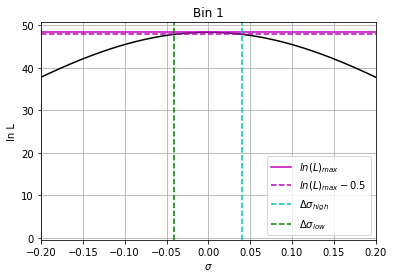

Sigma_high = 0.0397
Sigma_low = 0.041


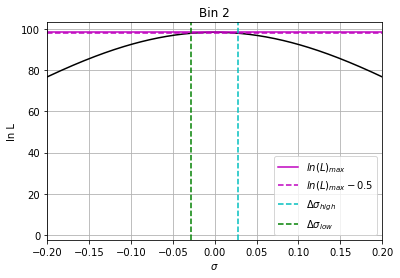

Sigma_high = 0.0281
Sigma_low = 0.0285


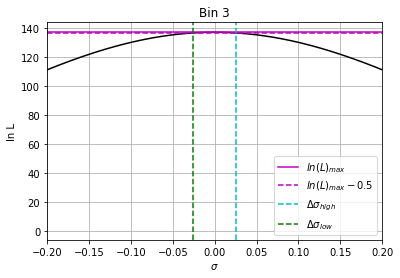

Sigma_high = 0.0257
Sigma_low = 0.0257


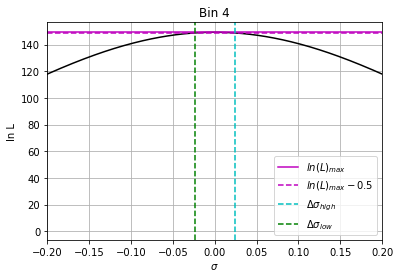

Sigma_high = 0.0237
Sigma_low = 0.0237


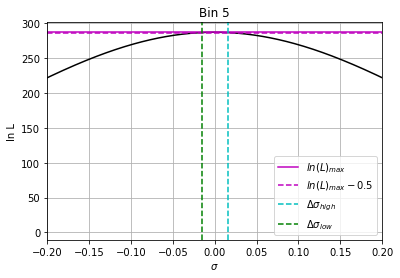

Sigma_high = 0.0154
Sigma_low = 0.015


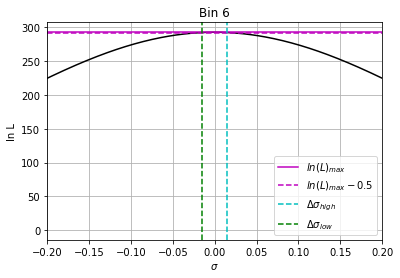

Sigma_high = 0.0146
Sigma_low = 0.0157


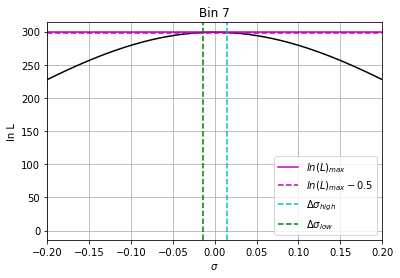

Sigma_high = 0.0147
Sigma_low = 0.014


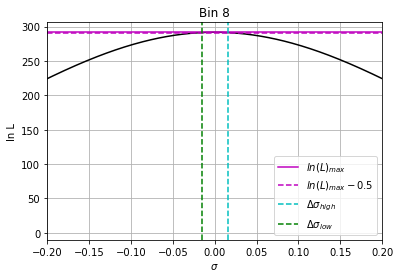

Sigma_high = 0.0159
Sigma_low = 0.0154


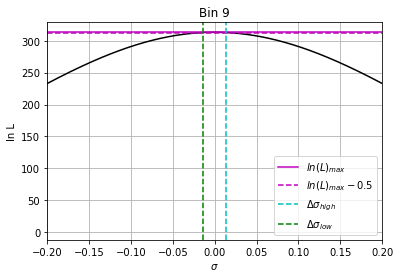

Sigma_high = 0.014
Sigma_low = 0.0141


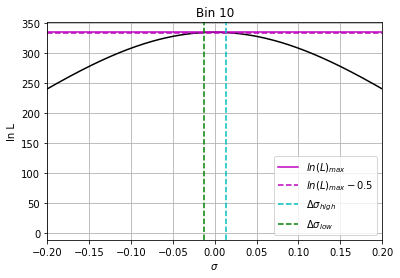

Sigma_high = 0.0134
Sigma_low = 0.0124


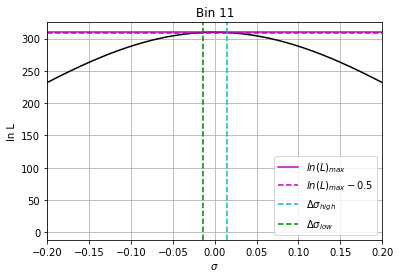

Sigma_high = 0.0143
Sigma_low = 0.0135


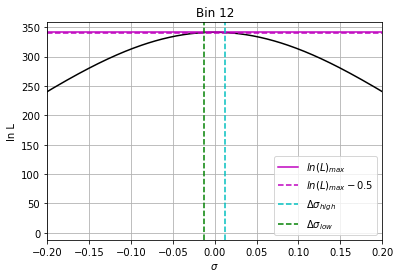

Sigma_high = 0.0125
Sigma_low = 0.0125


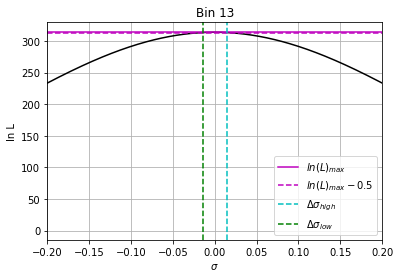

Sigma_high = 0.0145
Sigma_low = 0.014


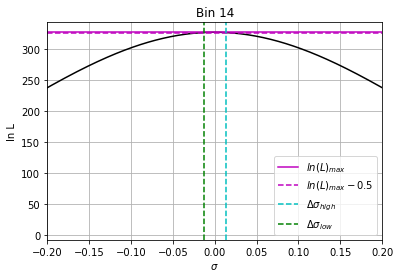

Sigma_high = 0.013
Sigma_low = 0.0128


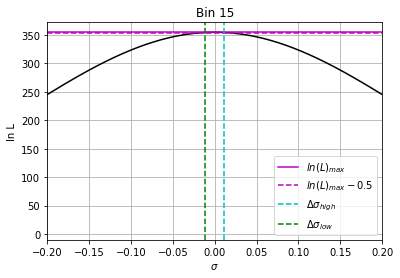

Sigma_high = 0.0114
Sigma_low = 0.0112


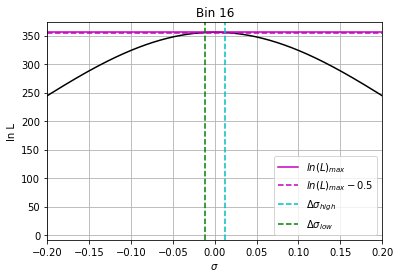

Sigma_high = 0.0117
Sigma_low = 0.0117


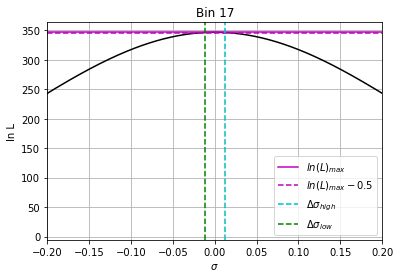

Sigma_high = 0.0119
Sigma_low = 0.0117


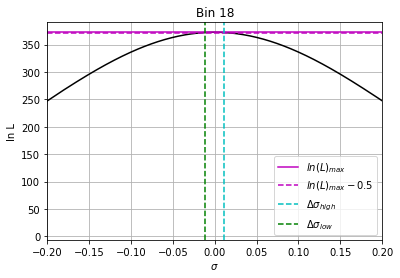

Sigma_high = 0.0109
Sigma_low = 0.0111


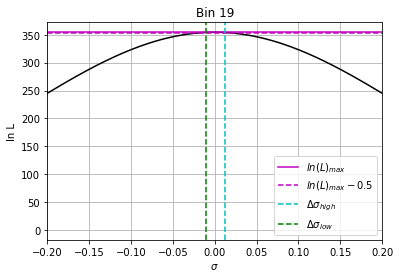

Sigma_high = 0.0117
Sigma_low = 0.011


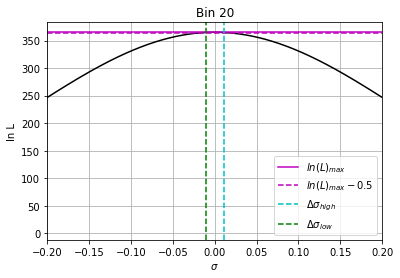

Sigma_high = 0.0108
Sigma_low = 0.0108


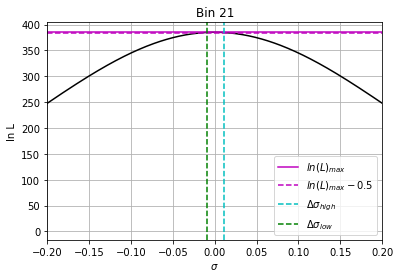

Sigma_high = 0.0105
Sigma_low = 0.0097


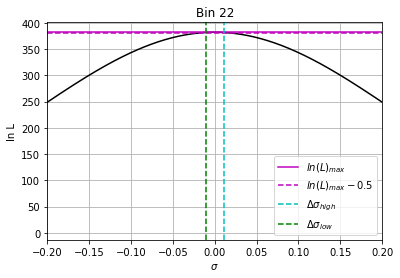

Sigma_high = 0.0106
Sigma_low = 0.0102


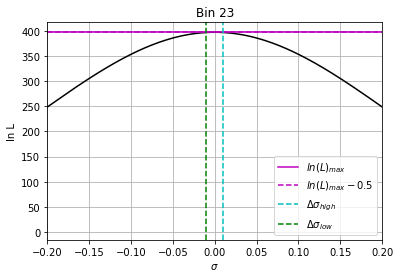

Sigma_high = 0.0099
Sigma_low = 0.01


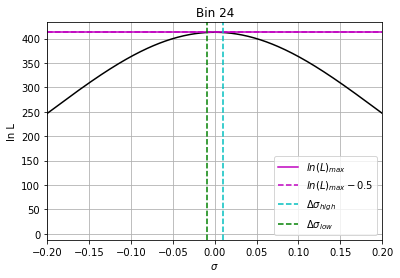

Sigma_high = 0.0096
Sigma_low = 0.0091


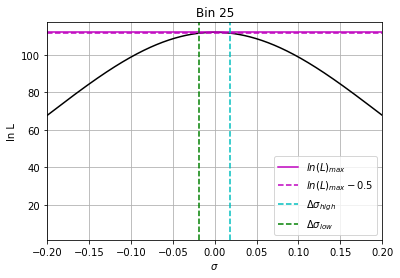

Sigma_high = 0.0185
Sigma_low = 0.0187
[ 48.41089045  98.43664453 136.93476108 149.22426167 287.0154693
 292.32699621 298.96571914 291.69667001 313.36847016 334.59007304
 309.7067798  341.45959443 313.7966324  327.43638776 354.6348975
 355.92487211 347.01730347 372.43109792 354.51419176 365.11401501
 385.08064718 382.03690634 396.99150671 412.80802268 112.01646729]


In [28]:
star_count = 0
pmcol6 = []

for i in range(25):
    star_in_bin = int(pmcol2[i])
    binstars = sortvel[star_count:star_count+star_in_bin]
    xaxis = np.linspace(np.amin(binstars),np.amax(binstars),1000)
    sd = pmcol4[i]
    y = norm.pdf(xaxis,0,sd)
    yaxis = y*lnL[i]/np.amax(y)
    s_high = xaxis[np.where(yaxis>lnL[i]-0.5)[0][-1]]
    s_low = xaxis[np.where(yaxis>lnL[i]-0.5)[0][0]]

    plt.plot(xaxis,yaxis,c='k')
    plt.axhline(y=lnL[i],label='$ln(L)_{max}$',c='m')
    plt.axhline(y=lnL[i]-0.5,ls='--',label='$ln(L)_{max}-0.5$',c='m')
    plt.axvline(x=s_high,ls='--',label='$\Delta\sigma_{high}$',c='c')
    plt.axvline(x=s_low,ls='--',label='$\Delta\sigma_{low}$',c='g')
    plt.legend(loc='lower right')
    plt.title('Bin {}'.format(i+1))
    plt.xlim(-0.2,0.2)
    #plt.ylim(350,370)
    plt.xlabel('$\sigma$')
    plt.ylabel('ln L')
    plt.grid()
    plt.show()

    print('Sigma_high = '+str(round(s_high,4)))
    print('Sigma_low = '+str(round(-1*s_low,4)))
    
    star_count += star_in_bin
    pmcol6 = np.append(pmcol6,(s_high-s_low)/2)

print(lnL)

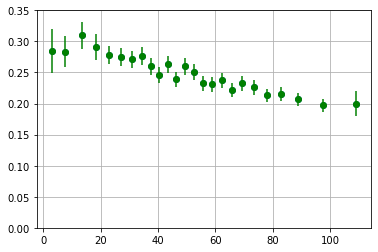

In [29]:
plt.scatter(pmcol3,pmcol4)
plt.errorbar(pmcol3,pmcol4,yerr=pmcol5,fmt='o',c='g')
#plt.errorbar(pmcol3,pmcol4,yerr=deltasigma,fmt='o')
plt.grid()
plt.ylim(0,0.35)
plt.show()

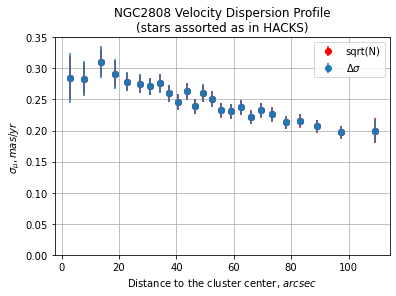

In [31]:
plt.scatter(pmcol3,pmcol4)
plt.errorbar(pmcol3,pmcol4,yerr=pmcol5,fmt='o',c='r',label='sqrt(N)')
plt.errorbar(pmcol3,pmcol4,yerr=pmcol6,fmt='o',label='$\Delta\sigma$')
plt.legend()
plt.grid()
plt.ylim(0,0.35)
plt.title('NGC2808 Velocity Dispersion Profile\n(stars assorted as in HACKS)')
plt.xlabel('Distance to the cluster center, $arcsec$')
plt.ylabel('$\sigma_\mu , mas/yr$')
plt.show()

In [32]:
lnL

array([ 48.41089045,  98.43664453, 136.93476108, 149.22426167,
       287.0154693 , 292.32699621, 298.96571914, 291.69667001,
       313.36847016, 334.59007304, 309.7067798 , 341.45959443,
       313.7966324 , 327.43638776, 354.6348975 , 355.92487211,
       347.01730347, 372.43109792, 354.51419176, 365.11401501,
       385.08064718, 382.03690634, 396.99150671, 412.80802268,
       112.01646729])

In [33]:
VDP = np.stack((pmcol1,pmcol2,pmcol3,pmcol4,pmcol5,pmcol6),axis=-1)
np.savetxt('VDP.txt', VDP)

## faint stars masterfile

In [34]:
f606w = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc_ngc2808_f606w_v1.0_phot-catalog-ep2.txt')
f814w = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc_ngc2808_f814w_v1.0_phot-catalog-ep2.txt')
pmcat = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc3_ngc2808_multi_v1.0_pm-catalog.txt')

                                                   # for f606w catalog
mag606        = f606w[:,0]                         # star magnitudes
magrms606     = f606w[:,1]                         # mag rms
qfit606       = f606w[:,2]                         # QFIT
o606          = f606w[:,3]                         # o
nf606         = f606w[:,4]                         # Nf
nu606         = f606w[:,5]                         # Nu
radxs606      = f606w[:,6]                         # RADXS
sky606        = f606w[:,7]                         # sky
skyrms606     = f606w[:,8]                         # sky rms
sat606        = f606w[:,9]                         # saturation flag

                                                  # for f814w catalog
mag814        = f814w[:,0]                        # star magnitudes for f814w
magrms814     = f814w[:,1]                        # mag rms
qfit814       = f814w[:,2]                        # QFIT
o814          = f814w[:,3]                        # o
nf814         = f814w[:,4]                        # Nf
nu814         = f814w[:,5]                        # Nu
radxs814      = f814w[:,6]                        # RADXS
sky814        = f814w[:,7]                        # sky
skyrms814     = f814w[:,8]                        # sky rms
sat814        = f814w[:,9]                        # saturation flag

magdif        = f606w[:,0] - f814w[:,0]           # star magnitude difference, f606w - f814w

                                                  # for pm catalog
asc           = pmcat[:,0]                        # ascension
dec           = pmcat[:,1]                        # declination
xcoor         = pmcat[:,2]                        # x-coordinate
ycoor         = pmcat[:,3]                        # y-coordinate
acosd         = pmcat[:,4]                        # alpha cos delta
err_acosd     = pmcat[:,5]                        # error of alpha cos delta
d             = pmcat[:,6]                        # delta
err_d         = pmcat[:,7]                        # error of delta
chi2_acosd    = pmcat[:,8]                        # chi2 alpha cos delta
chi2_d        = pmcat[:,9]                        # chi2 delta
nfpm          = pmcat[:,10]                       # Nf
nupm          = pmcat[:,11]                       # Nu
tbase         = pmcat[:,12]                       # temporal baseline of PM [time]
raw_acosd     = pmcat[:,13]                       # raw alpha cos delta
err_raw_acosd = pmcat[:,14]                       # error of raw alpha cos delta
raw_d         = pmcat[:,15]                       # raw delta
err_raw_d     = pmcat[:,16]                       # error of raw delta
corr_f        = pmcat[:,17]                       # correction flag

oldID         = f606w[:,10]                       # star ID

In [35]:
m606_faint      = []                            # star mag f606w
m814_faint      = []                            # star mag f814w
mag_dif_faint   = []                            # f606w - f814w
x_new_faint     = []                            # x-coordinate
y_new_faint     = []                            # y-coordinate
AcosD_faint     = []                            # alpha * cos(delta)
err_AcosD_faint = []                            # error of alpha * cos(delta)
D_faint         = []                            # delta
err_D_faint     = []                            # error of delta
dist_faint      = []                            # dist from center
newID_faint     = []                            # star ID

for i in range(len(mag606)):
    
    # removing zero mags
    if mag606[i] != 0 and mag814[i] !=0:
            
        # removing star mag rms > 0.15
        if magrms606[i] < 0.15 and magrms814[i] < 0.15:
                
            # removing star QFIT < 0.75
            if qfit606[i] > 0.75 and qfit814[i] > 0.75:
                    
                # removing star RADXS > 0.15
                if radxs606[i] < 0.15 and radxs814[i] < 0.15:
                        
                    # removing star photometric ratio, Nu/Nf < 0.75
                    if nu606[i]/nf606[i] > 0.75 and nu814[i]/nf814[i] > 0.75:
                            
                        # removing star fractional flux, o > 1
                        if o606[i] < 1 and o814[i] < 1:
                                
                            # removing star flux above sky < 3.5 sigma
                            if skyrms606[i] > 3.5 and skyrms814[i] > 3.5:
                                    
                                # removing star PM ratio, Nu/Nf < 0.8 (or 0.9)
                                if nupm[i]/nfpm[i] > 0.9:
                                        
                                    # removing star chi2 alpha cos delta > 1.5 (or 1.25)
                                    if chi2_acosd[i] < 1.25:
                                            
                                        # removing star chi2 delta > 1.5 (or 1.25)
                                        if chi2_d[i] < 1.25:
                                                
                                            # removing star PM error > 0.5 mas/yr
                                            if err_acosd[i] < 0.5 and err_d[i] < 0.5:
                                                    
                                                # removing star with uncorrected a-posteriori
                                                if corr_f[i] == 0:
                                                    
                                                    #
                                                    if mag606[i]>19.5 and magdif[i]>0.6 and magdif[i]<1.1:
                                                        
                                                        #
                                                        if np.sqrt(acosd[i]**2 + d[i]**2) < 1 and mag606[i]<20.5:
                                                        
                                                            m606_faint      = np.append(m606_faint, mag606[i])
                                                            m814_faint      = np.append(m814_faint, mag814[i])
                                                            mag_dif_faint   = np.append(mag_dif_faint, magdif[i])
                                                            x_new_faint     = np.append(x_new_faint, xcoor[i])
                                                            y_new_faint     = np.append(y_new_faint, ycoor[i])
                                                            AcosD_faint     = np.append(AcosD_faint, acosd[i])
                                                            err_AcosD_faint = np.append(err_AcosD_faint, err_acosd[i])
                                                            D_faint         = np.append(D_faint, d[i])
                                                            err_D_faint     = np.append(err_D_faint, err_d[i])
                                                            dist_faint      = np.append(dist_faint, np.sqrt((xcoor[i]-5000)**2 + (ycoor[i]-5000)**2)/25)
                                                            newID_faint     = np.append(newID_faint, oldID[i])


/var/folders/ms/pknxtrgd5977fv3pfr0s8c4r0000gn/T/ipykernel_17735/3626597008.py:28: RuntimeWarning: invalid value encountered in double_scalars
  if nu606[i]/nf606[i] > 0.75 and nu814[i]/nf814[i] > 0.75:


In [36]:
masterfile_faint = np.stack((m606_faint,m814_faint,mag_dif_faint,x_new_faint,y_new_faint,AcosD_faint,err_AcosD_faint,D_faint,err_D_faint,dist_faint,newID_faint), axis = -1)
np.savetxt('masterfile_faint.txt',masterfile_faint)

In [37]:
tot_faint_star=len(newID_faint)

In [38]:
sortdistfaint = np.sort(dist_faint)
sortvelfaint = np.zeros(tot_faint_star)
sortvelerrfaint = np.zeros(tot_faint_star)
for j in range(tot_faint_star):
    sortvelfaint[np.searchsorted(sortdistfaint, dist_faint[j])]=AcosD_faint[j]
    sortvelerrfaint[np.searchsorted(sortdistfaint, dist_faint[j])]=err_AcosD_faint[j]

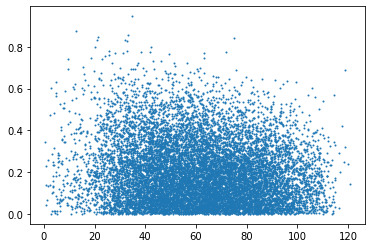

In [39]:
plt.scatter(sortdistfaint,abs(sortvelfaint),s=1)
plt.show()

In [40]:
print('Stars between 0 to 5 arcsec: {}'.format(len(np.where(sortdistfaint<5)[0])))
print('Stars between 5 to 10 arcsec: {}'.format(len(np.where(sortdistfaint<10)[0])-len(np.where(sortdistfaint<5)[0])))
print('Stars between 10 to 15 arcsec: {}'.format(len(np.where(sortdistfaint<15)[0])-len(np.where(sortdistfaint<10)[0])))
print('Stars between 15 to 20 arcsec: {}'.format(len(np.where(sortdistfaint<20)[0])-len(np.where(sortdistfaint<15)[0])))
print('Stars between 20 to 25 arcsec: {}'.format(len(np.where(sortdistfaint<25)[0])-len(np.where(sortdistfaint<20)[0])))
print('Stars between 25 to 30 arcsec: {}'.format(len(np.where(sortdistfaint<30)[0])-len(np.where(sortdistfaint<25)[0])))
print('Stars between 30 to 35 arcsec: {}'.format(len(np.where(sortdistfaint<35)[0])-len(np.where(sortdistfaint<30)[0])))
print('Stars between 35 to 40 arcsec: {}'.format(len(np.where(sortdistfaint<40)[0])-len(np.where(sortdistfaint<35)[0])))
print('Stars between 40 to 45 arcsec: {}'.format(len(np.where(sortdistfaint<45)[0])-len(np.where(sortdistfaint<40)[0])))
print('Stars between 45 to 50 arcsec: {}'.format(len(np.where(sortdistfaint<50)[0])-len(np.where(sortdistfaint<45)[0])))
print('Stars between 50 to 55 arcsec: {}'.format(len(np.where(sortdistfaint<55)[0])-len(np.where(sortdistfaint<50)[0])))
print('Stars between 55 to 60 arcsec: {}'.format(len(np.where(sortdistfaint<60)[0])-len(np.where(sortdistfaint<55)[0])))
print('Stars between 60 to 65 arcsec: {}'.format(len(np.where(sortdistfaint<65)[0])-len(np.where(sortdistfaint<60)[0])))
print('Stars between 65 to 70 arcsec: {}'.format(len(np.where(sortdistfaint<70)[0])-len(np.where(sortdistfaint<65)[0])))
print('Stars between 70 to 75 arcsec: {}'.format(len(np.where(sortdistfaint<75)[0])-len(np.where(sortdistfaint<70)[0])))
print('Stars between 75 to 80 arcsec: {}'.format(len(np.where(sortdistfaint<80)[0])-len(np.where(sortdistfaint<75)[0])))
print('Stars between 80 to 85 arcsec: {}'.format(len(np.where(sortdistfaint<85)[0])-len(np.where(sortdistfaint<80)[0])))
print('Stars between 85 to 90 arcsec: {}'.format(len(np.where(sortdistfaint<90)[0])-len(np.where(sortdistfaint<85)[0])))
print('Stars between 90 to 95 arcsec: {}'.format(len(np.where(sortdistfaint<95)[0])-len(np.where(sortdistfaint<90)[0])))
print('Stars between 95 to 100 arcsec: {}'.format(len(np.where(sortdistfaint<100)[0])-len(np.where(sortdistfaint<95)[0])))
print('Stars between 100 to 105 arcsec: {}'.format(len(np.where(sortdistfaint<105)[0])-len(np.where(sortdistfaint<100)[0])))
print('Stars between 105 to 110 arcsec: {}'.format(len(np.where(sortdistfaint<110)[0])-len(np.where(sortdistfaint<105)[0])))

Stars between 0 to 5 arcsec: 34
Stars between 5 to 10 arcsec: 60
Stars between 10 to 15 arcsec: 91
Stars between 15 to 20 arcsec: 123
Stars between 20 to 25 arcsec: 262
Stars between 25 to 30 arcsec: 446
Stars between 30 to 35 arcsec: 595
Stars between 35 to 40 arcsec: 723
Stars between 40 to 45 arcsec: 885
Stars between 45 to 50 arcsec: 975
Stars between 50 to 55 arcsec: 1004
Stars between 55 to 60 arcsec: 992
Stars between 60 to 65 arcsec: 999
Stars between 65 to 70 arcsec: 999
Stars between 70 to 75 arcsec: 913
Stars between 75 to 80 arcsec: 854
Stars between 80 to 85 arcsec: 750
Stars between 85 to 90 arcsec: 665
Stars between 90 to 95 arcsec: 504
Stars between 95 to 100 arcsec: 398
Stars between 100 to 105 arcsec: 263
Stars between 105 to 110 arcsec: 182


In [41]:
len(newID_faint)

12790

In [69]:
star_in_bin = []
for i in range(25):
    star_in_bin = np.append(star_in_bin,input(int()))

094
0100
0200
0400
0400
0400
0500
0500
0500
0600
0600
0600
0600
0600
0600
0600
0600
0600
0600
0600
0600
0600
0600
0600
0600


In [70]:
star_in_bin = star_in_bin.astype(int)
print(star_in_bin)

[ 94 100 200 400 400 400 500 500 500 600 600 600 600 600 600 600 600 600
 600 600 600 600 600 600 600]


In [71]:
testdist = np.zeros(25)
testdist[0] = np.average(sortdistfaint[0:94])
testdist[1] = np.average(sortdistfaint[94:194])
testdist[2] = np.average(sortdistfaint[194:394])
testdist[3] = np.average(sortdistfaint[394:794])
testdist[4] = np.average(sortdistfaint[794:1194])
testdist[5] = np.average(sortdistfaint[1194:1594])
testdist[6] = np.average(sortdistfaint[1594:2094])
testdist[7] = np.average(sortdistfaint[2094:2594])
testdist[8] = np.average(sortdistfaint[2594:3094])
testdist[9] = np.average(sortdistfaint[3094:3694])
testdist[10] = np.average(sortdistfaint[3694:4294])
testdist[11] = np.average(sortdistfaint[4294:4894])
testdist[12] = np.average(sortdistfaint[4894:5494])
testdist[13] = np.average(sortdistfaint[5494:6094])
testdist[14] = np.average(sortdistfaint[6094:6694])
testdist[15] = np.average(sortdistfaint[6694:7294])
testdist[16] = np.average(sortdistfaint[7294:7894])
testdist[17] = np.average(sortdistfaint[7894:8494])
testdist[18] = np.average(sortdistfaint[8494:9094])
testdist[19] = np.average(sortdistfaint[9094:9694])
testdist[20] = np.average(sortdistfaint[9694:10294])
testdist[21] = np.average(sortdistfaint[10294:10894])
testdist[22] = np.average(sortdistfaint[10894:11494])
testdist[23] = np.average(sortdistfaint[11494:12094])
testdist[24] = np.average(sortdistfaint[12094:12694])

In [72]:
test = np.zeros(25) 
test[0] = np.sqrt( ( np.sum( sortvelfaint[0:94]**2  )/(star_in_bin[0]) ))
test[1] = np.sqrt( ( np.sum( sortvelfaint[94:194]**2  )/(star_in_bin[1]) ))
test[2] = np.sqrt( ( np.sum( sortvelfaint[194:394]**2  )/(star_in_bin[2]) ))
test[3] = np.sqrt( ( np.sum( sortvelfaint[394:794]**2  )/(star_in_bin[3]) ))
test[4] = np.sqrt( ( np.sum( sortvelfaint[794:1194]**2  )/(star_in_bin[4]) ))
test[5] = np.sqrt( ( np.sum( sortvelfaint[1194:1594]**2  )/(star_in_bin[5]) ))
test[6] = np.sqrt( ( np.sum( sortvelfaint[1594:2094]**2  )/(star_in_bin[6]) ))
test[7] = np.sqrt( ( np.sum( sortvelfaint[2094:2594]**2  )/(star_in_bin[7]) ))
test[8] = np.sqrt( ( np.sum( sortvelfaint[2594:3094]**2  )/(star_in_bin[8]) ))
test[9] = np.sqrt( ( np.sum( sortvelfaint[3094:3694]**2  )/(star_in_bin[9]) ))
test[10] = np.sqrt( ( np.sum( sortvelfaint[3694:4294]**2  )/(star_in_bin[10]) ))
test[11] = np.sqrt( ( np.sum( sortvelfaint[4294:4894]**2  )/(star_in_bin[11]) ))
test[12] = np.sqrt( ( np.sum( sortvelfaint[4894:5494]**2  )/(star_in_bin[12]) ))
test[13] = np.sqrt( ( np.sum( sortvelfaint[5494:6094]**2  )/(star_in_bin[13]) ))
test[14] = np.sqrt( ( np.sum( sortvelfaint[6094:6694]**2  )/(star_in_bin[14]) ))
test[15] = np.sqrt( ( np.sum( sortvelfaint[6694:7294]**2  )/(star_in_bin[15]) ))
test[16] = np.sqrt( ( np.sum( sortvelfaint[7294:7894]**2  )/(star_in_bin[16]) ))
test[17] = np.sqrt( ( np.sum( sortvelfaint[7894:8494]**2  )/(star_in_bin[17]) ))
test[18] = np.sqrt( ( np.sum( sortvelfaint[8494:9094]**2  )/(star_in_bin[18]) ))
test[19] = np.sqrt( ( np.sum( sortvelfaint[9094:9694]**2  )/(star_in_bin[19]) ))
test[20] = np.sqrt( ( np.sum( sortvelfaint[9694:10294]**2  )/(star_in_bin[20]) ))
test[21] = np.sqrt( ( np.sum( sortvelfaint[10294:10894]**2  )/(star_in_bin[21]) ))
test[22] = np.sqrt( ( np.sum( sortvelfaint[10894:11494]**2  )/(star_in_bin[22]) ))
test[23] = np.sqrt( ( np.sum( sortvelfaint[11494:12094]**2  )/(star_in_bin[23]) ))
test[24] = np.sqrt( ( np.sum( sortvelfaint[12094:12694]**2  )/(star_in_bin[24]) ))

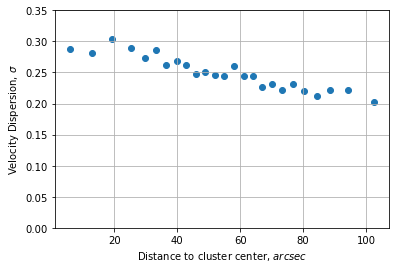

In [73]:
plt.scatter(testdist,test)
plt.ylim(0,0.35)
plt.xlabel('Distance to cluster center, $arcsec$')
plt.ylabel('Velocity Dispersion, $\sigma$')
plt.grid()
plt.show()

In [74]:
count = 0
lnL_faint = []

for i in range(25):
    starnum = int(star_in_bin[i])
    sigmafaint = test[i]
    velfaint = sortvelfaint[count:count+starnum]
    errorfaint = sortvelerrfaint[count:count+starnum]
    velsumfaint = 0
    for j in range(starnum):
        abcfaint = sigmafaint**2 + errorfaint[i]**2
        totfaint = velfaint[i]**2/abcfaint + np.log(abcfaint)
        velsumfaint += totfaint
    lnL_faint = np.append(lnL_faint,-0.5*velsumfaint)
    count += starnum
    lnL_faint = abs(lnL_faint)
    
print(lnL_faint)

[ 49.7476436  113.91548797 284.25729101 124.27122034  46.49990884
 236.83115368 440.38958734 602.27976107 658.92064451 823.46118004
 484.63444464 685.80478943 667.58380848 725.80772805 803.9788342
 603.65960552 875.38683614 666.79909335 876.4436473  423.38701442
 886.8063284  534.46476896 163.10097664 651.15566197 950.68053115]


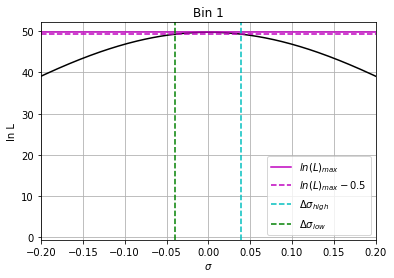

Sigma_high = 0.0396
Sigma_low = 0.04


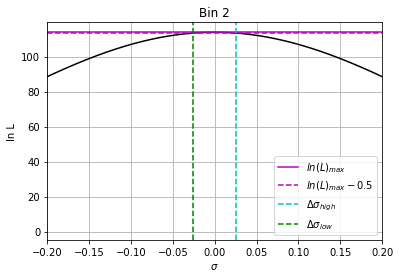

Sigma_high = 0.0252
Sigma_low = 0.0263


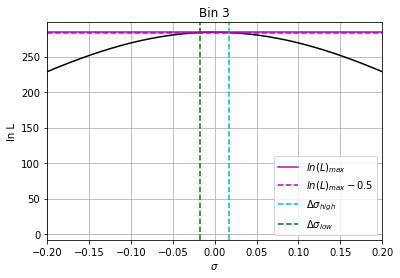

Sigma_high = 0.0165
Sigma_low = 0.0171


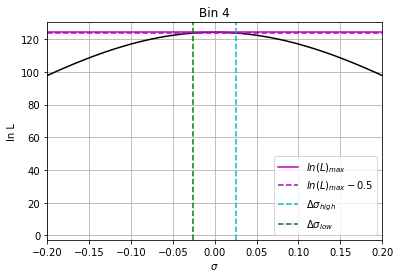

Sigma_high = 0.0249
Sigma_low = 0.0259


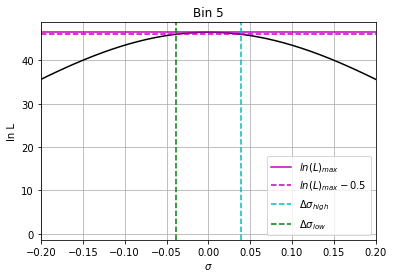

Sigma_high = 0.0389
Sigma_low = 0.0392


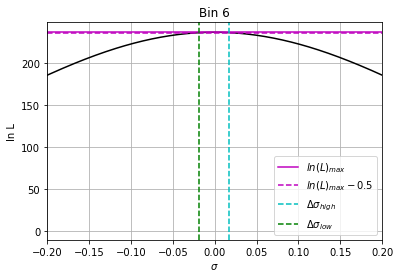

Sigma_high = 0.017
Sigma_low = 0.0185


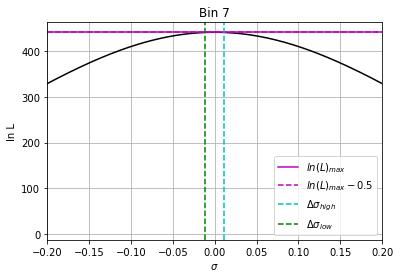

Sigma_high = 0.0116
Sigma_low = 0.0112


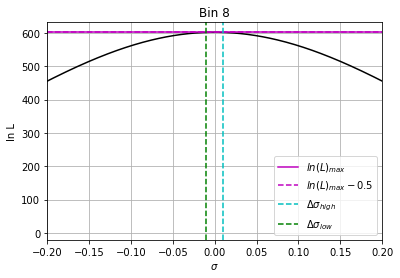

Sigma_high = 0.0099
Sigma_low = 0.0108


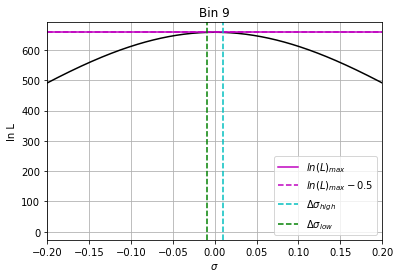

Sigma_high = 0.0094
Sigma_low = 0.009


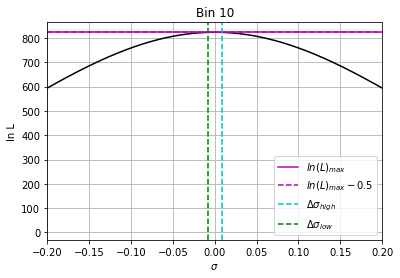

Sigma_high = 0.0084
Sigma_low = 0.0078


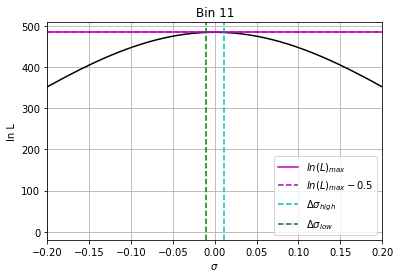

Sigma_high = 0.0109
Sigma_low = 0.0104


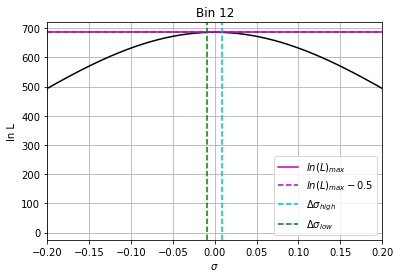

Sigma_high = 0.0086
Sigma_low = 0.0086


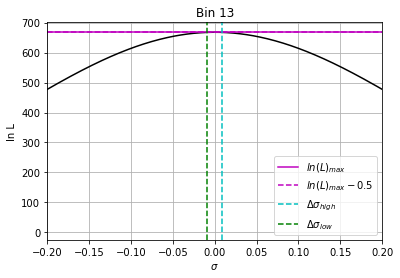

Sigma_high = 0.009
Sigma_low = 0.0095


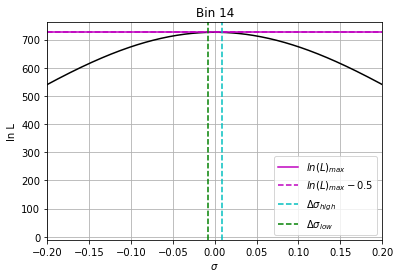

Sigma_high = 0.0092
Sigma_low = 0.0085


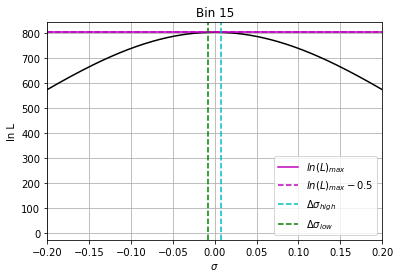

Sigma_high = 0.0078
Sigma_low = 0.0075


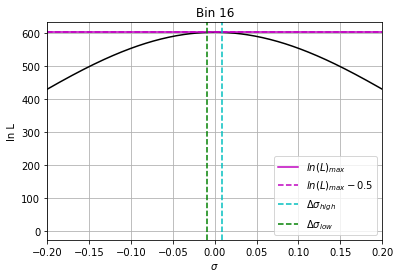

Sigma_high = 0.0086
Sigma_low = 0.0096


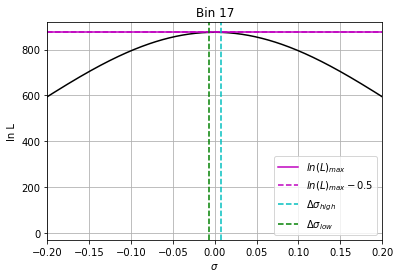

Sigma_high = 0.0076
Sigma_low = 0.0069


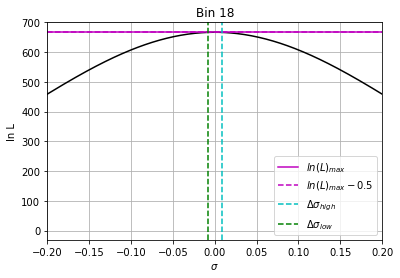

Sigma_high = 0.0082
Sigma_low = 0.0075


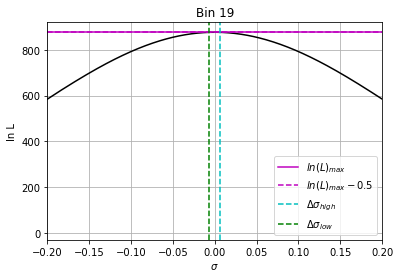

Sigma_high = 0.0067
Sigma_low = 0.007


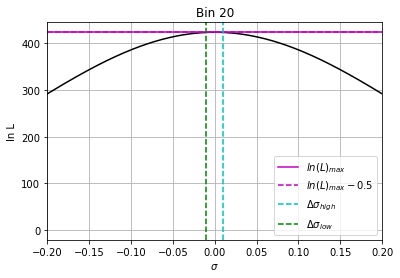

Sigma_high = 0.0103
Sigma_low = 0.0103


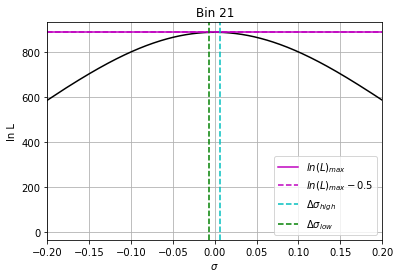

Sigma_high = 0.0064
Sigma_low = 0.0073


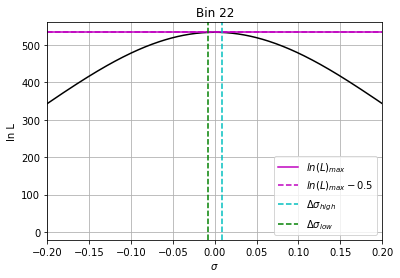

Sigma_high = 0.0088
Sigma_low = 0.0081


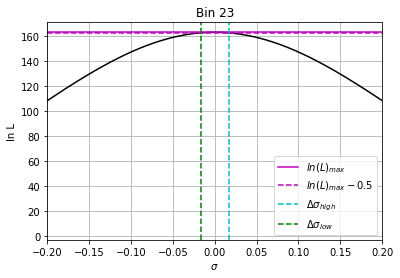

Sigma_high = 0.0165
Sigma_low = 0.0164


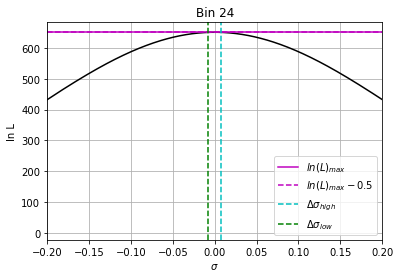

Sigma_high = 0.0078
Sigma_low = 0.0084


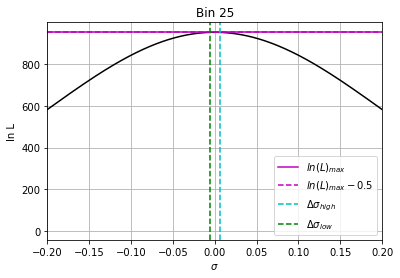

Sigma_high = 0.0063
Sigma_low = 0.0057


In [75]:
star_count = 0
pmcol6faint = []

for i in range(25):
    
    binstars = sortvelfaint[star_count:star_count+int(star_in_bin[i])]
    xaxis = np.linspace(np.amin(binstars),np.amax(binstars),1000)
    sd = test[i]
    y = norm.pdf(xaxis,0,sd)
    yaxis = y*lnL_faint[i]/np.amax(y)
    s_high = xaxis[np.where(yaxis>lnL_faint[i]-0.5)[0][-1]]
    s_low = xaxis[np.where(yaxis>lnL_faint[i]-0.5)[0][0]]

    plt.plot(xaxis,yaxis,c='k')
    plt.axhline(y=lnL_faint[i],label='$ln(L)_{max}$',c='m')
    plt.axhline(y=lnL_faint[i]-0.5,ls='--',label='$ln(L)_{max}-0.5$',c='m')
    plt.axvline(x=s_high,ls='--',label='$\Delta\sigma_{high}$',c='c')
    plt.axvline(x=s_low,ls='--',label='$\Delta\sigma_{low}$',c='g')
    plt.legend(loc='lower right')
    plt.title('Bin {}'.format(i+1))
    plt.xlim(-0.2,0.2)
    #plt.ylim(350,370)
    plt.xlabel('$\sigma$')
    plt.ylabel('ln L')
    plt.grid()
    plt.show()

    print('Sigma_high = '+str(round(s_high,4)))
    print('Sigma_low = '+str(round(-1*s_low,4)))
    
    star_count += int(star_in_bin[i])
    pmcol6faint = np.append(pmcol6faint,(s_high-s_low)/2)

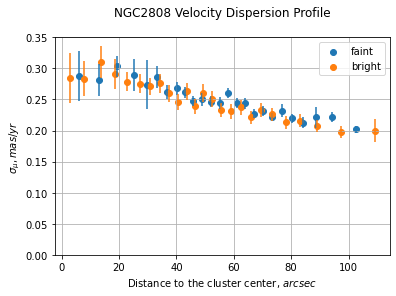

In [76]:
plt.scatter(testdist,test,label='faint')
plt.errorbar(testdist,test,yerr=pmcol6faint,fmt='o',ms=0.1)
plt.scatter(pmcol3,pmcol4,label='bright')
plt.errorbar(pmcol3,pmcol4,yerr=pmcol6,fmt='o',ms=0.1)
plt.ylim(0,0.35)
plt.title('NGC2808 Velocity Dispersion Profile\n')
plt.xlabel('Distance to the cluster center, $arcsec$')
plt.ylabel('$\sigma_\mu , mas/yr$')
plt.legend()
plt.grid()
plt.show()

In [79]:
pmcol1_faint = np.arange(1,26,1)
pmcol2_faint = star_in_bin
pmcol3_faint = testdist
pmcol4_faint = test
pmcol5_faint = np.arange(1,26,1)        # not used
pmcol6_faint = pmcol6faint

VDP_faint = np.stack((pmcol1_faint,pmcol2_faint,pmcol3_faint,pmcol4_faint,pmcol5_faint,pmcol6_faint),axis = -1)
np.savetxt('VDP_faint.txt',VDP_faint)

In [80]:
VDP = np.stack((pmcol1,pmcol2,pmcol3,pmcol4,pmcol5,pmcol6),axis=-1)
np.savetxt('VDP.txt', VDP)

In [ ]:
plt.scatter(pmcol3,pmcol4)
plt.errorbar(pmcol3,pmcol4,yerr=pmcol6,fmt='o')
plt.ylim(0,0.35)
plt.title('NGC2808 Velocity Dispersion Profile\n')
plt.xlabel('Distance to the cluster center, $arcsec$')
plt.ylabel('$\sigma_\mu , mas/yr$')
plt.grid()
plt.show()

## Model masterfile

In [26]:
RA,DEC,DCEN,RV,MASS,TYPE,MAG1,MAG2,unused1,unused2,unused3,unused4,unused5,unused6=np.loadtxt(ddir+'ngc2808.noimbh',unpack=True)

In [202]:
RA_model   = []
DEC_model  = []
DCEN_model = []         # need to change from arcmin to arcsec
RV_model   = []         # km/s
MASS_model = []         # solar mass
TYPE_model = []
MAG1_model = []
MAG2_model = []

for i in range(len(RV)):
    if TYPE[i]<10:
        if MASS[i]>0.0:
            RA_model   = np.append(RA_model,RA[i])
            DEC_model  = np.append(DEC_model,DEC[i])
            DCEN_model = np.append(DCEN_model,DCEN[i]*60)        # arcsec
            RV_model   = np.append(RV_model,abs(RV[i]))          # km/s
            MASS_model = np.append(MASS_model,MASS[i])           # solar mass
            TYPE_model = np.append(TYPE_model,TYPE[i])
            MAG1_model = np.append(MAG1_model,MAG1[i])
            MAG2_model = np.append(MAG2_model,MAG2[i])

masterfile_model = np.stack((RA_model,DEC_model,DCEN_model,RV_model,MASS_model,TYPE_model,MAG1_model,MAG2_model),axis=-1)
np.savetxt('masterfile_model.txt',masterfile_model)

tot_star_model = len(RV_model)

Note

1. velocity (x) vs number (y)
in the centre are there any fast moving stars
no cuts
superfasts maybe in foreground stars
limit to 200 km/s

2. use the dataset Holger sent - randomly generated - no errors
for RV changing from mas/yr to km/s
can try make a CMD using that
type 11 is white dwarf

# Loading everything after logging off

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

ddir = '/Users/XcaliburZee/Desktop/PHYS3900/NGC2808/'

# bright stars data
m606, m814, mag_dif, x_new, y_new, AcosD, err_AcosD, D, err_D, dist, newID = np.loadtxt('/Users/XcaliburZee/masterfile.txt', unpack=True)
tot_star = len(newID)

pmcol1,pmcol2,pmcol3,pmcol4,pmcol5,pmcol6=np.loadtxt('/Users/XcaliburZee/VDP.txt', unpack=True)
sortdist = np.sort(dist)
sortvel = np.zeros(tot_star)
sortvelerr = np.zeros(tot_star)
for j in range(tot_star):
    sortvel[np.searchsorted(sortdist, dist[j])]=AcosD[j]
    sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]
    
    
# faint stars data    
m606_faint,m814_faint,mag_dif_faint,x_new_faint,y_new_faint,AcosD_faint,err_AcosD_faint,D_faint,err_D_faint,dist_faint,newID_faint = np.loadtxt('/Users/XcaliburZee/masterfile_faint.txt', unpack=True)
tot_faint_star = len(newID_faint)

pmcol1_faint,pmcol2_faint,pmcol3_faint,pmcol4_faint,pmcol5_faint,pmcol6_faint=np.loadtxt('/Users/XcaliburZee/VDP_faint.txt', unpack=True)
sortdistfaint = np.sort(dist_faint)
sortvelfaint = np.zeros(tot_faint_star)
sortvelerrfaint = np.zeros(tot_faint_star)
for j in range(tot_faint_star):
    sortvelfaint[np.searchsorted(sortdistfaint, dist_faint[j])]=AcosD_faint[j]
    sortvelerrfaint[np.searchsorted(sortdistfaint, dist_faint[j])]=err_AcosD_faint[j]
    
    
# model data
RA_model,DEC_model,DCEN_model,RV_model,MASS_model,TYPE_model,MAG1_model,MAG2_model=np.loadtxt('/Users/XcaliburZee/masterfile_model.txt',unpack=True)
tot_star_model = len(RV_model)

sortdistmodel = np.sort(DCEN_model)
sortvelmodel = np.zeros(tot_star_model)
#sortvelerr = np.zeros(tot_star)
for j in range(tot_star_model):
    sortvelmodel[np.searchsorted(sortdistmodel, DCEN_model[j])]=abs(RV_model[j])
    #sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]

In [2]:
f606w = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc_ngc2808_f606w_v1.0_phot-catalog-ep2.txt')
f814w = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc_ngc2808_f814w_v1.0_phot-catalog-ep2.txt')
pmcat = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc3_ngc2808_multi_v1.0_pm-catalog.txt')

                                                   # for f606w catalog
mag606        = f606w[:,0]                         # star magnitudes
magrms606     = f606w[:,1]                         # mag rms
qfit606       = f606w[:,2]                         # QFIT
o606          = f606w[:,3]                         # o
nf606         = f606w[:,4]                         # Nf
nu606         = f606w[:,5]                         # Nu
radxs606      = f606w[:,6]                         # RADXS
sky606        = f606w[:,7]                         # sky
skyrms606     = f606w[:,8]                         # sky rms
sat606        = f606w[:,9]                         # saturation flag

                                                  # for f814w catalog
mag814        = f814w[:,0]                        # star magnitudes for f814w
magrms814     = f814w[:,1]                        # mag rms
qfit814       = f814w[:,2]                        # QFIT
o814          = f814w[:,3]                        # o
nf814         = f814w[:,4]                        # Nf
nu814         = f814w[:,5]                        # Nu
radxs814      = f814w[:,6]                        # RADXS
sky814        = f814w[:,7]                        # sky
skyrms814     = f814w[:,8]                        # sky rms
sat814        = f814w[:,9]                        # saturation flag

magdif        = f606w[:,0] - f814w[:,0]           # star magnitude difference, f606w - f814w

                                                  # for pm catalog
asc           = pmcat[:,0]                        # ascension
dec           = pmcat[:,1]                        # declination
xcoor         = pmcat[:,2]                        # x-coordinate
ycoor         = pmcat[:,3]                        # y-coordinate
acosd         = pmcat[:,4]                        # alpha cos delta
err_acosd     = pmcat[:,5]                        # error of alpha cos delta
d             = pmcat[:,6]                        # delta
err_d         = pmcat[:,7]                        # error of delta
chi2_acosd    = pmcat[:,8]                        # chi2 alpha cos delta
chi2_d        = pmcat[:,9]                        # chi2 delta
nfpm          = pmcat[:,10]                       # Nf
nupm          = pmcat[:,11]                       # Nu
tbase         = pmcat[:,12]                       # temporal baseline of PM [time]
raw_acosd     = pmcat[:,13]                       # raw alpha cos delta
err_raw_acosd = pmcat[:,14]                       # error of raw alpha cos delta
raw_d         = pmcat[:,15]                       # raw delta
err_raw_d     = pmcat[:,16]                       # error of raw delta
corr_f        = pmcat[:,17]                       # correction flag

oldID         = f606w[:,10]                       # star ID

### Changing from mas/yr to km/s

** distance to NGC2808 = 10.07 +- 0.24 kpc

** v(km/s) = 4.7404*d(kpc)*PM(mas/yr)

Our conversion factor is 4.7404*10.07

In [21]:
conv = 10.07*4.7404          # mas/yr to km/s

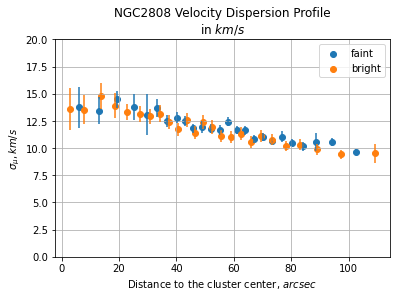

In [109]:
plt.scatter(testdist,test*10.07*4.7404,label='faint')
plt.errorbar(testdist,test*10.07*4.7404,yerr=pmcol6faint*10.07*4.7404,fmt='o',ms=0.1)
plt.scatter(pmcol3,pmcol4*10.07*4.7404,label='bright')
plt.errorbar(pmcol3,pmcol4*10.07*4.7404,yerr=pmcol6*10.07*4.7404,fmt='o',ms=0.1)
plt.ylim(0,20)
plt.title('NGC2808 Velocity Dispersion Profile\nin $km/s$')
plt.xlabel('Distance to the cluster center, $arcsec$')
plt.ylabel('$\sigma_\mu , km/s$')
plt.legend()
plt.grid()
plt.show()

In [14]:
sortvelkms = abs(sortvel)*conv
sortvelfaintkms = abs(sortvelfaint)*conv

In [28]:
sortpm = np.sort(abs(AcosD*conv))
sortpmfaint = np.sort(abs(AcosD_faint*conv))

absvel = np.linspace(1,47,24)
numstarvel = []

for i in range(24):
    
    numstarvel = np.append(numstarvel,len(np.where((sortpm<absvel[i]+1)&(sortpm>absvel[i]-1))[0]))

absvelfaint = np.linspace(1,47,24)
numstarvelfaint = []

for i in range(24):
    
    numstarvelfaint = np.append(numstarvelfaint,len(np.where((sortpmfaint<absvelfaint[i]+1)&(sortpmfaint>absvelfaint[i]-1))[0]))

sortpmall = np.append(sortpm,sortpmfaint)
absvelall = np.linspace(1,47,24)
numstarvelall = []

for i in range(24):
    
    numstarvelall = np.append(numstarvelall,len(np.where((sortpmall<absvelall[i]+1)&(sortpmall>absvelall[i]-1))[0]))

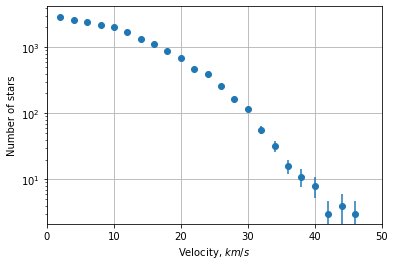

In [19]:
#plt.scatter(absvel,numstarvel,s=3)
#plt.errorbar(absvel,numstarvel,yerr=np.sqrt(numstarvel),fmt='o')

#plt.scatter(absvelfaint,numstarvelfaint,s=3)
#plt.errorbar(absvelfaint,numstarvelfaint,yerr=np.sqrt(numstarvelfaint),fmt='o')

plt.scatter(absvelall,numstarvelall,s=3)
plt.errorbar(absvelall,numstarvelall,yerr=np.sqrt(numstarvelall),fmt='o')

plt.xlim(0,50)
plt.yscale('log')
plt.xlabel('Velocity, $km/s$')
plt.ylabel('Number of stars')
plt.grid()
plt.show()

### For model

In [203]:
sortdistmodel = np.sort(DCEN_model)
sortvelmodel = np.zeros(tot_star_model)
#sortvelerr = np.zeros(tot_star)
for j in range(tot_star_model):
    sortvelmodel[np.searchsorted(sortdistmodel, DCEN_model[j])]=abs(RV_model[j])
    #sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]

In [278]:
bin_model =[]
dist_model = []
veldisp_model = []
binstar_model = 10000
for i in range(int(tot_star_model/binstar_model)):
    bef = i*binstar_model
    aft = i*binstar_model + binstar_model
    bin_model = np.append(bin_model,i+1)
    dist_model = np.append(dist_model,np.average(sortdistmodel[bef:aft]))
    veldisp_model = np.append(veldisp_model,np.sqrt( ( np.sum( sortvelmodel[bef:aft]**2  )/binstar_model )))

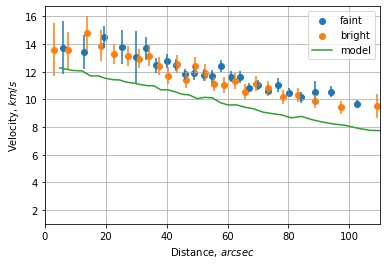

In [205]:
plt.scatter(pmcol3_faint,pmcol4_faint*conv,label='faint')
plt.errorbar(pmcol3_faint,pmcol4_faint*conv,yerr=pmcol6_faint*conv,fmt='o',ms=0.1)
plt.scatter(pmcol3,pmcol4*conv,label='bright')
plt.errorbar(pmcol3,pmcol4*conv,yerr=pmcol6*conv,fmt='o',ms=0.1)
plt.plot(dist_model,veldisp_model,label='model')
plt.legend()
plt.xlim(0,110)
plt.xlabel('Distance, $arcsec$')
plt.ylabel('Velocity, $km/s$')
plt.grid()
plt.show()

In [25]:
close_stars_dist = []
close_stars_vel = []
for i in range(len(sortdistmodel)):
    if sortdistmodel[i]<120:
        close_stars_dist = np.append(close_stars_dist,sortdistmodel[i])
        close_stars_vel = np.append(close_stars_vel,sortvelmodel[i])

sortpm_model = np.sort(RV_model)
absvel_model = np.linspace(1,55,28)
numstarvel_model = []

for i in range(28):
    
    numstarvel_model = np.append(numstarvel_model,len(np.where((sortpm_model<absvel_model[i]+1)&(sortpm_model>absvel_model[i]-1))[0]))

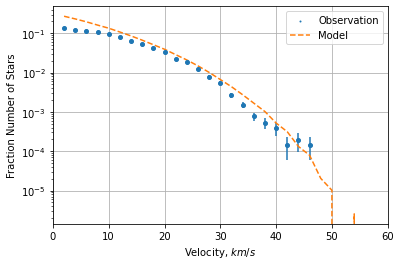

In [208]:
plt.scatter(absvelall,numstarvelall/len(sortpmall),s=1,label='Observation')
plt.errorbar(absvelall,numstarvelall/len(sortpmall),yerr=np.sqrt(numstarvelall)/len(sortpmall),fmt='o',ms=4)

plt.plot(absvel_model,numstarvel_model/len(close_stars_dist),'--',label='Model')

plt.xlim(0,60)
plt.yscale('log')
plt.xlabel('Velocity, $km/s$')
plt.ylabel('Fraction Number of Stars')
plt.legend()
plt.grid()
plt.show()

In [172]:
len(RV_model)

624526

In [173]:
len(close_stars_dist)

393221

In [58]:
len(sortpmall)

20891

In [147]:
np.amax(RV_model)

43.59032

In [148]:
np.amax(sortpmall)

46.321415416360004

In [90]:
np.where(RV==np.amax(RV))[0][0]

346020

In [91]:
MASS[np.where(RV==np.amax(RV))[0][0]]

0.366

In [101]:
MAG1[np.where(RV==np.amax(RV))[0][0]]

24.53

In [102]:
MAG2[np.where(RV==np.amax(RV))[0][0]]

23.13

In [151]:
np.amin(MASS_model)

0.67

## 1% IMBH

In [190]:
RA_1, DEC_1, DCEN_1, RV_1, MASS_1, TYPE_1, MAG1_1, MAG2_1,unused7,unused8,unused9,unused10,unused11,unused12 = np.loadtxt(ddir+'ngc2808_imbh1.0',unpack=True)

In [223]:
RA_model1   = []
DEC_model1  = []
DCEN_model1 = []         # need to change from arcmin to arcsec
RV_model1   = []         # km/s
MASS_model1 = []         # solar mass
TYPE_model1 = []
MAG1_model1 = []
MAG2_model1 = []

for i in range(len(RV_1)):
    if TYPE_1[i]<10:
        if MASS_1[i]>0.0:
            RA_model1   = np.append(RA_model1,RA_1[i])
            DEC_model1  = np.append(DEC_model1,DEC_1[i])
            DCEN_model1 = np.append(DCEN_model1,DCEN_1[i]*60)        # arcsec
            RV_model1   = np.append(RV_model1,abs(RV_1[i]))          # km/s
            MASS_model1 = np.append(MASS_model1,MASS_1[i])           # solar mass
            TYPE_model1 = np.append(TYPE_model1,TYPE_1[i])
            MAG1_model1 = np.append(MAG1_model1,MAG1_1[i])
            MAG2_model1 = np.append(MAG2_model1,MAG2_1[i])

masterfile_model1 = np.stack((RA_model1,DEC_model1,DCEN_model1,RV_model1,MASS_model1,TYPE_model1,MAG1_model1,MAG2_model1),axis=-1)
np.savetxt('masterfile_model1.txt',masterfile_model1)

tot_star_model1 = len(RV_model1)

In [26]:
sortdistmodel1 = np.sort(DCEN_model1)
sortvelmodel1 = np.zeros(tot_star_model1)
#sortvelerr = np.zeros(tot_star)
for j in range(tot_star_model1):
    sortvelmodel1[np.searchsorted(sortdistmodel1, DCEN_model1[j])]=abs(RV_model1[j])
    #sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]

bin_model1 =[]
dist_model1 = []
veldisp_model1 = []
binstar_model1 = 10000
for i in range(int(tot_star_model1/binstar_model1)):
    bef = i*binstar_model1
    aft = i*binstar_model1 + binstar_model1
    bin_model1 = np.append(bin_model1,i+1)
    dist_model1 = np.append(dist_model1,np.average(sortdistmodel1[bef:aft]))
    veldisp_model1 = np.append(veldisp_model1,np.sqrt( ( np.sum( sortvelmodel1[bef:aft]**2  )/binstar_model1 )))

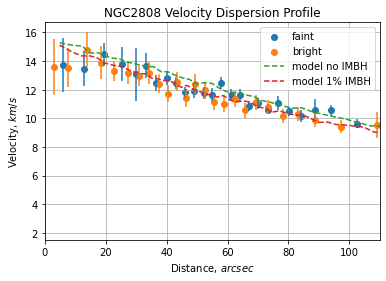

In [281]:
plt.scatter(pmcol3_faint,pmcol4_faint*conv,label='faint')
plt.errorbar(pmcol3_faint,pmcol4_faint*conv,yerr=pmcol6_faint*conv,fmt='o',ms=0.1)

plt.scatter(pmcol3,pmcol4*conv,label='bright')
plt.errorbar(pmcol3,pmcol4*conv,yerr=pmcol6*conv,fmt='o',ms=0.1)

plt.plot(dist_model,veldisp_model,'--',label='model no IMBH')
plt.plot(dist_model1,veldisp_model1,'--',label='model 1% IMBH')
#plt.plot(dist_modeltest, veldisp_modeltest,'--',label='test')

plt.legend()
plt.xlim(0,110)
plt.xlabel('Distance, $arcsec$')
plt.ylabel('Velocity, $km/s$')
plt.title('NGC2808 Velocity Dispersion Profile')
plt.grid()
plt.show()

In [30]:
close_stars_dist1 = []
close_stars_vel1 = []
for i in range(len(sortdistmodel1)):
    if sortdistmodel1[i]<120:
        close_stars_dist1 = np.append(close_stars_dist1,sortdistmodel1[i])
        close_stars_vel1 = np.append(close_stars_vel1,sortvelmodel1[i])

sortpm_model1 = np.sort(RV_model1)
absvel_model1 = np.linspace(1,59,30)
numstarvel_model1 = []

for i in range(30):
    
    numstarvel_model1 = np.append(numstarvel_model1,len(np.where((sortpm_model1<absvel_model1[i]+1)&(sortpm_model1>absvel_model1[i]-1))[0]))

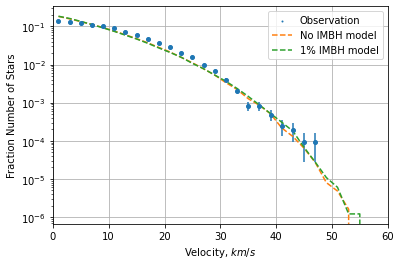

In [31]:
plt.scatter(absvelall,numstarvelall/np.sum(numstarvelall),s=1,label='Observation')
plt.errorbar(absvelall,numstarvelall/np.sum(numstarvelall),yerr=np.sqrt(numstarvelall)/len(sortpmall),fmt='o',ms=4)

plt.plot(absvel_model,numstarvel_model/np.sum(numstarvel_model),'--',label='No IMBH model')
plt.plot(absvel_model1,numstarvel_model1/np.sum(numstarvel_model1),'--',label='1% IMBH model')

plt.xlim(0,60)
plt.yscale('log')
plt.xlabel('Velocity, $km/s$')
plt.ylabel('Fraction Number of Stars')
plt.legend()
plt.grid()
plt.show()

### 5% Model

In [304]:
RA_5, DEC_5, DCEN_5, RV_5, MASS_5, TYPE_5, MAG1_5, MAG2_5,unused13,unused14,unused15,unused16,unused17,unused18 = np.loadtxt(ddir+'ngc2808_imbh5.0',unpack=True)

In [305]:
RA_model5   = []
DEC_model5  = []
DCEN_model5 = []         # need to change from arcmin to arcsec
RV_model5   = []         # km/s
MASS_model5 = []         # solar mass
TYPE_model5 = []
MAG1_model5 = []
MAG2_model5 = []

for i in range(len(RV_5)):
    if TYPE_5[i]<10:
        if MASS_5[i]>0.0:
            RA_model5   = np.append(RA_model5,RA_5[i])
            DEC_model5  = np.append(DEC_model5,DEC_5[i])
            DCEN_model5 = np.append(DCEN_model5,DCEN_5[i]*60)        # arcsec
            RV_model5   = np.append(RV_model5,abs(RV_5[i]))          # km/s
            MASS_model5 = np.append(MASS_model5,MASS_5[i])           # solar mass
            TYPE_model5 = np.append(TYPE_model5,TYPE_5[i])
            MAG1_model5 = np.append(MAG1_model5,MAG1_5[i])
            MAG2_model5 = np.append(MAG2_model5,MAG2_5[i])

masterfile_model5 = np.stack((RA_model5,DEC_model5,DCEN_model5,RV_model5,MASS_model5,TYPE_model5,MAG1_model5,MAG2_model5),axis=-1)
np.savetxt('masterfile_model5.txt',masterfile_model5)

tot_star_model5 = len(RV_model5)

In [306]:
sortdistmodel5 = np.sort(DCEN_model5)
sortvelmodel5 = np.zeros(tot_star_model5)
#sortvelerr = np.zeros(tot_star)
for j in range(tot_star_model5):
    sortvelmodel5[np.searchsorted(sortdistmodel5, DCEN_model5[j])]=abs(RV_model5[j])
    #sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]

In [307]:
bin_model5 =[]
dist_model5 = []
veldisp_model5 = []
binstar_model5 = 10000
for i in range(int(tot_star_model5/binstar_model5)):
    bef = i*binstar_model5
    aft = i*binstar_model5 + binstar_model5
    bin_model5 = np.append(bin_model5,i+1)
    dist_model5 = np.append(dist_model5,np.average(sortdistmodel5[bef:aft]))
    veldisp_model5 = np.append(veldisp_model5,np.sqrt( ( np.sum( sortvelmodel5[bef:aft]**2  )/binstar_model5 )))

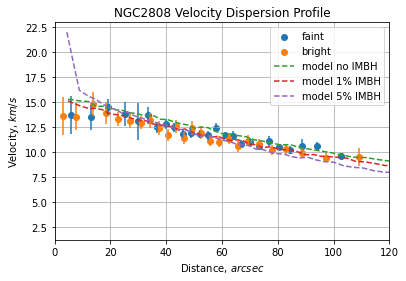

In [356]:
plt.scatter(pmcol3_faint,pmcol4_faint*conv,label='faint')
plt.errorbar(pmcol3_faint,pmcol4_faint*conv,yerr=pmcol6_faint*conv,fmt='o',ms=0.1)

plt.scatter(pmcol3,pmcol4*conv,label='bright')
plt.errorbar(pmcol3,pmcol4*conv,yerr=pmcol6*conv,fmt='o',ms=0.1)

plt.plot(dist_model,veldisp_model,'--',label='model no IMBH')
plt.plot(dist_model1,veldisp_model1,'--',label='model 1% IMBH')
plt.plot(dist_model5,veldisp_model5,'--',label='model 5% IMBH')
#plt.plot(dist_modeltest, veldisp_modeltest,'--',label='test')

plt.legend()
plt.xlim(0,120)
plt.xlabel('Distance, $arcsec$')
plt.ylabel('Velocity, $km/s$')
plt.title('NGC2808 Velocity Dispersion Profile')
plt.grid()
plt.show()

In [309]:
close_stars_dist5 = []
close_stars_vel5 = []
for i in range(len(sortdistmodel5)):
    if sortdistmodel5[i]<120:
        close_stars_dist5 = np.append(close_stars_dist5,sortdistmodel5[i])
        close_stars_vel5 = np.append(close_stars_vel5,sortvelmodel5[i])

In [310]:
np.amax(RV_model5)

1036.5732

In [311]:
sortpm_model5 = np.sort(RV_model5)

In [314]:
sortpm_model5[-10:-1]

array([ 100.35553,  107.60577,  118.98726,  120.30645,  127.42565,
        139.51889,  226.02724,  226.02724, 1036.5732 ])

In [339]:
sortpm_model5 = np.sort(RV_model5)
absvel_model5 = np.linspace(0.1,3.1,16)
numstarvel_model5 = []

for i in range(16):
    
    numstarvel_model5 = np.append(numstarvel_model5,len(np.where((np.log10(sortpm_model5)<absvel_model5[i]+0.1)&(np.log10(sortpm_model5)>absvel_model5[i]-0.1))[0]))
    

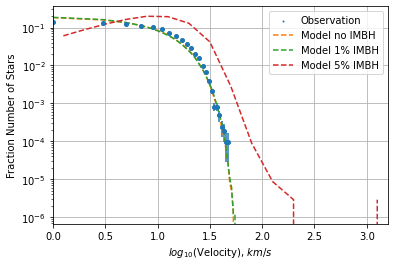

In [359]:
plt.scatter(np.log10(absvelall),numstarvelall/np.sum(numstarvelall),s=1,label='Observation')
plt.errorbar(np.log10(absvelall),numstarvelall/np.sum(numstarvelall),yerr=np.sqrt(numstarvelall)/len(sortpmall),fmt='o',ms=4)

plt.plot(np.log10(absvel_model),numstarvel_model/np.sum(numstarvel_model),'--',label='Model no IMBH')
plt.plot(np.log10(absvel_model1),numstarvel_model1/np.sum(numstarvel_model1),'--',label='Model 1% IMBH')
plt.plot(absvel_model5,numstarvel_model5/np.sum(numstarvel_model5),'--',label='Model 5% IMBH')

plt.xlim(0,3.2)
plt.yscale('log')
plt.xlabel('$log_{10}$(Velocity), $km/s$')
plt.ylabel('Fraction Number of Stars')
plt.legend()
plt.grid()
plt.show()

### Using raw data

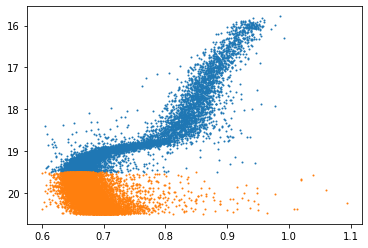

In [383]:
plt.scatter(mag_dif,m606,s=1)
plt.scatter(mag_dif_faint,m606_faint,s=1)
plt.gca().invert_yaxis()
plt.show()

In [385]:
np.where(AcosD_faint*conv>50)

(array([], dtype=int64),)

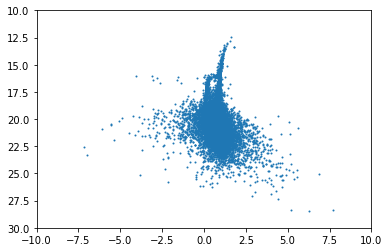

In [387]:
plt.scatter(magdif,mag606,s=1)
plt.xlim(-10,10)
plt.ylim(10,30)
plt.gca().invert_yaxis()
plt.show()

In [391]:
len(np.where((acosd*conv>50)&(acosd*conv<200))[0])

2480

## Kolmogorov-Smirnov test

In [360]:
from scipy.stats import kstest

In [361]:
# KS test: Observation vs No IMBH
kstest(numstarvelall/np.sum(numstarvelall),numstarvel_model/np.sum(numstarvel_model))

KstestResult(statistic=0.21428571428571427, pvalue=0.5193701383186387)

In [362]:
# KS test: Observation vs 1% IMBH
kstest(numstarvelall/np.sum(numstarvelall),numstarvel_model1/np.sum(numstarvel_model1))

KstestResult(statistic=0.26666666666666666, pvalue=0.25406145439371175)

In [363]:
# KS test: Observation vs 5% IMBH
kstest(numstarvelall/np.sum(numstarvelall),numstarvel_model5/np.sum(numstarvel_model5))

KstestResult(statistic=0.4375, pvalue=0.0398645368448074)

In [365]:
kstest(numstarvelall/np.sum(numstarvelall),numstarvel_model/np.sum(numstarvel_model))[1]

0.5193701383186387

In [370]:
len(np.where((acosd*conv>50)&(acosd*conv<200))[0])

2480

In [372]:
np.amax(acosd)*conv

1172.2291565065202

In [373]:
np.sum(MASS)

517658.94499999995

In [375]:
np.sum(MASS_1)

329557.623

In [376]:
np.sum(MASS_5)

300485.265

In [377]:
veldisp_model5

array([21.9778802 , 16.1681401 , 15.58411466, 15.24042791, 14.75645295,
       14.42030947, 14.22838231, 13.87612086, 13.99898266, 13.64307575,
       13.47259611, 13.28570524, 13.07604833, 12.95485885, 12.77027444,
       12.68115695, 12.44891908, 12.25996223, 12.23569512, 12.10353877,
       11.83842024, 11.56648924, 11.68358119, 11.50072479, 11.35601461,
       11.14743037, 11.04324477, 10.76968756, 10.74097437, 10.61862201,
       10.27422951, 10.24214405,  9.98949963,  9.82383815,  9.7799252 ,
        9.52341362,  9.40589942,  9.4670523 ,  9.19992899,  9.02870724,
        8.96585555,  8.62286925,  8.46251111,  8.3899342 ,  8.11291093,
        7.96585961,  7.97300183,  7.73104019,  7.5746936 ,  7.25975323,
        7.22746875,  6.93608122,  6.88084696,  6.70270739,  6.58504386,
        6.46426994,  6.22757563,  6.02641972,  5.84137767,  5.6527244 ,
        5.56683794,  5.35117689,  5.24533162,  4.99792326,  4.88080647,
        4.69407036,  4.48589858,  4.36331284,  4.18772972,  4.07

CDF

$ \sigma_{RV}=4.7404 d \sigma_{\mu} $

$$ lnL = - \frac{1}{2} \sum_{i}^{N} \left\{ \frac{(v_{rad,i}-v_{rad})^2}{\sigma_{rad}^2+\epsilon_{rad,i}^2} + ln(\sigma_{rad}^2+\epsilon_{rad,i}^2) + \frac{(v_{tan,i}-v_{tan})^2}{\sigma_{tan}^2+\epsilon_{tan,i}^2} + ln(\sigma_{tan}^2+\epsilon_{tan,i}^2) \right\} $$

# Load data

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

ddir = '/Users/XcaliburZee/Desktop/PHYS3900/NGC2808/'

# bright stars data
m606, m814, mag_dif, x_new, y_new, AcosD, err_AcosD, D, err_D, dist, newID = np.loadtxt('/Users/XcaliburZee/masterfile.txt', unpack=True)
tot_star = len(newID)

pmcol1,pmcol2,pmcol3,pmcol4,pmcol5,pmcol6=np.loadtxt('/Users/XcaliburZee/VDP.txt', unpack=True)
sortdist = np.sort(dist)
sortvel = np.zeros(tot_star)
sortvelerr = np.zeros(tot_star)
for j in range(tot_star):
    sortvel[np.searchsorted(sortdist, dist[j])]=AcosD[j]
    sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]
    
    
# faint stars data    
m606_faint,m814_faint,mag_dif_faint,x_new_faint,y_new_faint,AcosD_faint,err_AcosD_faint,D_faint,err_D_faint,dist_faint,newID_faint = np.loadtxt('/Users/XcaliburZee/masterfile_faint.txt', unpack=True)
tot_faint_star = len(newID_faint)

pmcol1_faint,pmcol2_faint,pmcol3_faint,pmcol4_faint,pmcol5_faint,pmcol6_faint=np.loadtxt('/Users/XcaliburZee/VDP_faint.txt', unpack=True)
sortdistfaint = np.sort(dist_faint)
sortvelfaint = np.zeros(tot_faint_star)
sortvelerrfaint = np.zeros(tot_faint_star)
for j in range(tot_faint_star):
    sortvelfaint[np.searchsorted(sortdistfaint, dist_faint[j])]=AcosD_faint[j]
    sortvelerrfaint[np.searchsorted(sortdistfaint, dist_faint[j])]=err_AcosD_faint[j]
    
    
# model no imbh data
RA_model,DEC_model,DCEN_model,RV_model,MASS_model,TYPE_model,MAG1_model,MAG2_model=np.loadtxt('/Users/XcaliburZee/masterfile_model.txt',unpack=True)
tot_star_model = len(RV_model)

sortdistmodel = np.sort(DCEN_model)
sortvelmodel = np.zeros(tot_star_model)
#sortvelerr = np.zeros(tot_star)
for j in range(tot_star_model):
    sortvelmodel[np.searchsorted(sortdistmodel, DCEN_model[j])]=abs(RV_model[j])
    #sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]
    
bin_model =[]
dist_model = []
veldisp_model = []
binstar_model = 10000
for i in range(int(tot_star_model/binstar_model)):
    bef = i*binstar_model
    aft = i*binstar_model + binstar_model
    bin_model = np.append(bin_model,i+1)
    dist_model = np.append(dist_model,np.average(sortdistmodel[bef:aft]))
    veldisp_model = np.append(veldisp_model,np.sqrt( ( np.sum( sortvelmodel[bef:aft]**2  )/binstar_model )))

# model 1% data
RA_model1,DEC_model1,DCEN_model1,RV_model1,MASS_model1,TYPE_model1,MAG1_model1,MAG2_model1=np.loadtxt('/Users/XcaliburZee/masterfile_model1.txt',unpack=True)
tot_star_model1 = len(RV_model1)

sortdistmodel1 = np.sort(DCEN_model1)
sortvelmodel1 = np.zeros(tot_star_model1)
#sortvelerr = np.zeros(tot_star)
for j in range(tot_star_model1):
    sortvelmodel1[np.searchsorted(sortdistmodel1, DCEN_model1[j])]=abs(RV_model1[j])
    #sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]
    
bin_model1 =[]
dist_model1 = []
veldisp_model1 = []
binstar_model1 = 10000
for i in range(int(tot_star_model1/binstar_model1)):
    bef = i*binstar_model1
    aft = i*binstar_model1 + binstar_model1
    bin_model1 = np.append(bin_model1,i+1)
    dist_model1 = np.append(dist_model1,np.average(sortdistmodel1[bef:aft]))
    veldisp_model1 = np.append(veldisp_model1,np.sqrt( ( np.sum( sortvelmodel1[bef:aft]**2  )/binstar_model1 )))
    
# model 5% data
RA_model5,DEC_model5,DCEN_model5,RV_model5,MASS_model5,TYPE_model5,MAG1_model5,MAG2_model5=np.loadtxt('/Users/XcaliburZee/masterfile_model5.txt',unpack=True)
tot_star_model5 = len(RV_model5)

sortdistmodel5 = np.sort(DCEN_model5)
sortvelmodel5 = np.zeros(tot_star_model5)
#sortvelerr = np.zeros(tot_star)
for j in range(tot_star_model5):
    sortvelmodel5[np.searchsorted(sortdistmodel5, DCEN_model5[j])]=abs(RV_model5[j])
    #sortvelerr[np.searchsorted(sortdist, dist[j])]=err_AcosD[j]
    
bin_model5 =[]
dist_model5 = []
veldisp_model5 = []
binstar_model5 = 10000
for i in range(int(tot_star_model5/binstar_model5)):
    bef = i*binstar_model5
    aft = i*binstar_model5 + binstar_model5
    bin_model5 = np.append(bin_model5,i+1)
    dist_model5 = np.append(dist_model5,np.average(sortdistmodel5[bef:aft]))
    veldisp_model5 = np.append(veldisp_model5,np.sqrt( ( np.sum( sortvelmodel5[bef:aft]**2  )/binstar_model5 )))
    
f606w = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc_ngc2808_f606w_v1.0_phot-catalog-ep2.txt')
f814w = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc_ngc2808_f814w_v1.0_phot-catalog-ep2.txt')
pmcat = np.loadtxt(ddir+'hlsp_hacks_hst_acs-wfc3_ngc2808_multi_v1.0_pm-catalog.txt')

                                                   # for f606w catalog
mag606        = f606w[:,0]                         # star magnitudes
magrms606     = f606w[:,1]                         # mag rms
qfit606       = f606w[:,2]                         # QFIT
o606          = f606w[:,3]                         # o
nf606         = f606w[:,4]                         # Nf
nu606         = f606w[:,5]                         # Nu
radxs606      = f606w[:,6]                         # RADXS
sky606        = f606w[:,7]                         # sky
skyrms606     = f606w[:,8]                         # sky rms
sat606        = f606w[:,9]                         # saturation flag

                                                  # for f814w catalog
mag814        = f814w[:,0]                        # star magnitudes for f814w
magrms814     = f814w[:,1]                        # mag rms
qfit814       = f814w[:,2]                        # QFIT
o814          = f814w[:,3]                        # o
nf814         = f814w[:,4]                        # Nf
nu814         = f814w[:,5]                        # Nu
radxs814      = f814w[:,6]                        # RADXS
sky814        = f814w[:,7]                        # sky
skyrms814     = f814w[:,8]                        # sky rms
sat814        = f814w[:,9]                        # saturation flag

magdif        = f606w[:,0] - f814w[:,0]           # star magnitude difference, f606w - f814w

                                                  # for pm catalog
asc           = pmcat[:,0]                        # ascension
dec           = pmcat[:,1]                        # declination
xcoor         = pmcat[:,2]                        # x-coordinate
ycoor         = pmcat[:,3]                        # y-coordinate
acosd         = pmcat[:,4]                        # alpha cos delta
err_acosd     = pmcat[:,5]                        # error of alpha cos delta
d             = pmcat[:,6]                        # delta
err_d         = pmcat[:,7]                        # error of delta
chi2_acosd    = pmcat[:,8]                        # chi2 alpha cos delta
chi2_d        = pmcat[:,9]                        # chi2 delta
nfpm          = pmcat[:,10]                       # Nf
nupm          = pmcat[:,11]                       # Nu
tbase         = pmcat[:,12]                       # temporal baseline of PM [time]
raw_acosd     = pmcat[:,13]                       # raw alpha cos delta
err_raw_acosd = pmcat[:,14]                       # error of raw alpha cos delta
raw_d         = pmcat[:,15]                       # raw delta
err_raw_d     = pmcat[:,16]                       # error of raw delta
corr_f        = pmcat[:,17]                       # correction flag

oldID         = f606w[:,10]                       # star ID

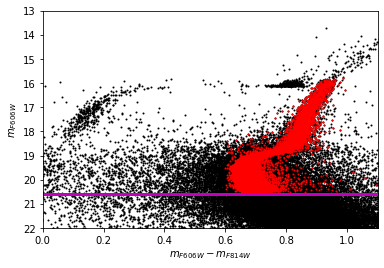

In [41]:
plt.scatter(magdif,mag606,s=1,c='k')
plt.scatter(mag_dif,m606,s=1,c='r')
plt.scatter(mag_dif_faint,m606_faint,s=1,c='r')
plt.ylim(13,22)
plt.xlim(0,1.1)
plt.axhline(y=20.6,c='m',lw=3)
plt.gca().invert_yaxis()
#plt.legend()
plt.xlabel('$m_{F606W} - m_{F814W}$')
plt.ylabel('$m_{F606W}$')
plt.show()

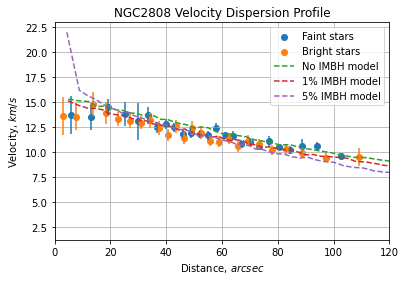

In [24]:
plt.scatter(pmcol3_faint,pmcol4_faint*conv,label='Faint stars')
plt.errorbar(pmcol3_faint,pmcol4_faint*conv,yerr=pmcol6_faint*conv,fmt='o',ms=0.1)

plt.scatter(pmcol3,pmcol4*conv,label='Bright stars')
plt.errorbar(pmcol3,pmcol4*conv,yerr=pmcol6*conv,fmt='o',ms=0.1)

plt.plot(dist_model,veldisp_model,'--',label='No IMBH model')
plt.plot(dist_model1,veldisp_model1,'--',label='1% IMBH model')
plt.plot(dist_model5,veldisp_model5,'--',label='5% IMBH model')
#plt.plot(dist_modeltest, veldisp_modeltest,'--',label='test')

plt.legend()
plt.xlim(0,120)
plt.xlabel('Distance, $arcsec$')
plt.ylabel('Velocity, $km/s$')
plt.title('NGC2808 Velocity Dispersion Profile')
plt.grid()
plt.show()